In [1]:
# import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
from scipy.spatial import distance
import random as rand
import pickle
from scipy import stats
import time


# allow us to re-use the framework from the src directory
import sys, os
sys.path.append(os.path.abspath(os.path.join('../')))

import max_ent.examples.grid_9_by_9 as G
from max_ent.utility.support import *
from max_ent.gridworld import Directions


rand.seed(123)
np.random.seed(123)

In [2]:
def f(count_stat):
    Z = []

    for x in range(9):
        temp_grid = []
        for y in range(9):
            #print(f"({x},{y})")
            temp_grid.append(np.sum(count_stat[0][y][8-x]))
            
        #print(temp_grid)
        Z.append(temp_grid)
    return np.array(Z)

In [3]:
n_trials = 10 #

n_trajectories = 500

bootstrap = 0
n_constraints = 18

threshold1 = 200 # 
threshold2 = 0.95 # THIS REMOVE SECOND CONDITION
threshold3 = 0.1
list_threshold3 = [0.1, 0.3, 0.6, 0.9] # try with 0.9 or 1.0 / myopic and non-myopic S1
threshold4 = 200 # 


df = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df7 = pd.DataFrame()

Iteration 0
[0.9625 0.0625 0.0625 0.9625 0.9625 0.0625 0.9625 0.9625]
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}
{'blue': [], 'green': [], 'cs': array([ 6, 24, 40, 43, 38, 12, 32, 49, 34, 58, 42, 25, 26, 22, 16, 57, 50,
       51]), 'ca': [RIGHT, UP_LEFT]}
[0.9625 0.0625 0.0625 0.9625 0.9625 0.0625 0.9625 0.9625]
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}


/Users/aloreggia/Documents/GitHub/wmca/mc/mca.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  action_thresholds[1] = expected_avg_reward / current_reward
/Users/aloreggia/Documents/GitHub/wmca/mc/mca.py:327: RuntimeWarning: invalid value encountered in double_scalars
  x = np.abs(current_length - expected_avg_length) / max_diff_len
/Users/aloreggia/Documents/GitHub/wmca/max_ent/utility/support.py:86: RuntimeWarning: invalid value encountered in long_scalars
  dict_mca['avg_time'] = time_s1 / usage_s1
/Users/aloreggia/Documents/GitHub/wmca/max_ent/utility/support.py:88: RuntimeWarning: invalid value encountered in double_scalars
  dict_mca['avg_reward'] = reward_s1 / usage_s1
/Users/aloreggia/Documents/GitHub/wmca/mc/mca.py:245: RuntimeWarning: divide by zero encountered in double_scalars
  if (action_thresholds[4]/action_thresholds[3] > expected_time_s2/expected_cost_s1):


{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}


/Users/aloreggia/Documents/GitHub/wmca/mc/mca.py:245: RuntimeWarning: invalid value encountered in double_scalars
  if (action_thresholds[4]/action_thresholds[3] > expected_time_s2/expected_cost_s1):


{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}


/Users/aloreggia/Documents/GitHub/wmca/max_ent/utility/support.py:104: RuntimeWarning: invalid value encountered in long_scalars
  dict_mca['avg_time'] = time_s2 / usage_s2
/Users/aloreggia/Documents/GitHub/wmca/max_ent/utility/support.py:106: RuntimeWarning: invalid value encountered in double_scalars
  dict_mca['avg_reward'] = reward_s2 / usage_s2


{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x1102eca58>}
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x11

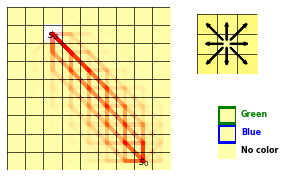

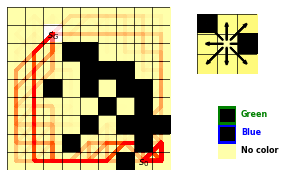

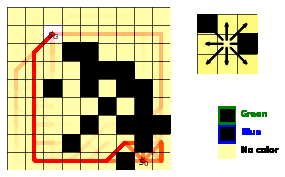

In [4]:

time_tot = int(round(time.time() * 1000))

df = pd.DataFrame()
js_div = pd.DataFrame()
mca = []

for i in range(n_trials):
    print(f"Iteration {i}")
    #generate constraints
    blue, green, cs, ca, start, goal = generate_constraints(9, n_constraints=n_constraints)
    constraints = {'blue': blue, 'green': green, 'cs':cs, 'ca':ca}
    
    '''blue = [21,  9, 59,  1,  0, 20]
    green = [42, 18, 76, 41, 23, 30]
    cs = [63, 74, 13, 39, 48, 38]
    ca = [Directions.DOWN_LEFT, Directions.UP_LEFT]'''
    start =7
    goal = 65
    
    #generate nomminal 
    time_exp = int(round(time.time() * 1000))
    n, n_cfg, demo_n, f1 = create_world('Nominal', blue, green, start=start, goal=goal, n_trajectories=n_trajectories)
    time_exp = int(round(time.time() * 1000)) - time_exp 
    temp_matrix = count_states(demo_n.trajectories, n_cfg.mdp, n, constraints)
    '''temp_dict=build_dict(temp_matrix, type_mca='nominal')
    temp_dict['time'] = time_exp / n_trajectories
    df = pd.concat([df, temp_dict])'''
    
    Z_distr = f(temp_matrix)
    Z_distr = np.array(Z_distr)
    Z_distr = Z_distr + 1E-3
    Z_distr[8-int(start/9)][int(start%9)]=0
    Z_distr[8-int(goal/9)][int(goal%9)] = 0

    #plt.imshow(Z_distr/np.sum(Z_distr), cmap='hot', interpolation='nearest')
    #plt.show()

    #Z_distr/np.sum(Z_distr)
    distr = np.array(Z_distr/np.sum(Z_distr))
    
    new_distr = []
    for i in range(len(distr)):
        new_distr.append(distr[len(distr)-i-1])

    new_distr = np.array(new_distr)


    cs = np.random.choice(np.arange(0,81), replace=False, p = new_distr.flatten(), size = n_constraints)
    constraints = {'blue': blue, 'green': green, 'cs':cs, 'ca':ca}
    print(constraints)
    #exit()
    
    #generate constrained grid
    cc = [1, 2]
    time_exp = int(round(time.time() * 1000))
    c, c_cfg, demo_c, f2 = create_world('Constrained', blue, green, cs, ca, cc, start=start, goal=goal, check=True, n_trajectories=n_trajectories)
    time_exp = int(round(time.time() * 1000)) - time_exp 
    
    #COMPUTE STATISTICS FOR NOMINAL
    temp_matrix = count_states(demo_n.trajectories, c_cfg.mdp, n, constraints)
    temp_dict=build_dict(temp_matrix, type_mca='nominal', demo = demo_n, constraints= constraints)
    temp_dict['time'] = time_exp / n_trajectories
    df = pd.concat([df, temp_dict])
    
    #COMPUTE STATISTICS FOR CONSTRAINED
    temp_matrix = count_states(demo_c.trajectories, c_cfg.mdp, n, constraints)
    temp_dict=build_dict(temp_matrix, type_mca='const', demo = demo_c, constraints= constraints)
    temp_dict['time'] = time_exp / n_trajectories
    df = pd.concat([df, temp_dict])
    
    
    '''s1_noMyopic = System1Solver(myopic=False)
    mca_s1_nb_noMyopic = MCA(n=n, c=c, s1=s1_noMyopic, demo=None, only_s1=True)
    demo_mca_s1_nb_noMyopic = mca_s1_nb_noMyopic.generate_trajectories(n_trajectories)
    temp_matrix_mca_s1_nb_noMyopic = count_states(demo_mca_s1_nb_noMyopic.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
    temp_dict=build_dict(temp_matrix_mca_s1_nb_noMyopic, type_mca='S1 noMyopic', agent=mca_s1_nb_noMyopic, s1_usage=mca_s1_nb_noMyopic.getStatistics()[0])
    #f1 = G.plot_world(f'Only S1', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_s1_nb_noMyopic, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
    df = pd.concat([df, temp_dict])'''

    #s1_Myopic = System1Solver(myopic=False, random=True)
    '''mca_s1_nb_Myopic = MCA(n=n, c=c, s1=s1_Myopic, demo=None, only_s1=True)
    demo_mca_s1_nb_Myopic = mca_s1_nb_Myopic.generate_trajectories(n_trajectories)
    temp_matrix_mca_s1_nb_Myopic = count_states(demo_mca_s1_nb_Myopic.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
    temp_dict=build_dict(temp_matrix_mca_s1_nb_Myopic, type_mca='S1 Myopic', agent=mca_s1_nb_Myopic, s1_usage=mca_s1_nb_Myopic.getStatistics()[0])
    #f1 = G.plot_world(f'Only S1', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_s1_nb_Myopic, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
    df = pd.concat([df, temp_dict])'''

    mca_s2 = MCA(n=n, c=c, demo=None, threshold5=1, only_s2=True)
    demo_mca_s2 = mca_s2.generate_trajectories(n_trajectories)
    #temp_matrix_mca_s2 = count_states(demo_mca_s2.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
    temp_dict=build_dict( type_mca='S2', agent=mca_s2 , demo = demo_mca_s2, constraints= constraints)
    #f1 = G.plot_world(f'Only S2', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_s2, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
    df = pd.concat([df, temp_dict])

    for threshold3 in list_threshold3:
        s1_ra0 = System1Solver(myopic=False, ra=0)
        mca_01_myopic = MCA(n=n, c=c, s1=s1_ra0, demo=None, threshold1=threshold1, threshold2=threshold2, threshold3 = threshold3, threshold4 = threshold4, threshold5=1)	
        demo_mca_01_myopic = mca_01_myopic.generate_trajectories(n_trajectories)
        #temp_matrix_mca_01_myopic = count_states(demo_mca_01_myopic.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
        temp_dict=build_dict(type_mca='SOFAI w/ S1 ra=0.0', agent=mca_01_myopic, t3= threshold3, demo = demo_mca_01_myopic, constraints= constraints)
        f1 = G.plot_world(f'SOFAI_myopic', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_01_myopic, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
        df = pd.concat([df, temp_dict])
        
        temp_jsdiv = {}
        temp_jsdiv['t3'] = threshold3
        temp_jsdiv['t4'] = threshold4
        temp_jsdiv['jsdiv'] = js_divergence((mca_s2.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s2.modelSelf.ntra_per_transition + 1E-10), (mca_01_myopic.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_01_myopic.modelSelf.ntra_per_transition + 1E-10))
        temp_jsdiv['type'] = 'SOFAI w/ S1 ra=0.0'
        temp_jsdiv = pd.DataFrame(data=temp_jsdiv, index=[0])
        js_div = pd.concat([js_div, temp_jsdiv])

        s1_ra0 = System1Solver(myopic=False, ra=0.25)
        mca_01_myopic = MCA(n=n, c=c, s1=s1_ra0, demo=None, threshold1=threshold1, threshold2=threshold2, threshold3 = threshold3, threshold4 = threshold4, threshold5=1)	
        demo_mca_01_myopic = mca_01_myopic.generate_trajectories(n_trajectories)
        #temp_matrix_mca_01_myopic = count_states(demo_mca_01_myopic.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
        temp_dict=build_dict( type_mca='SOFAI w/ S1 ra=0.25', agent=mca_01_myopic, t3= threshold3, demo = demo_mca_01_myopic, constraints= constraints)
        f1 = G.plot_world(f'SOFAI_myopic', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_01_myopic, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
        df = pd.concat([df, temp_dict])
        
        temp_jsdiv = {}
        temp_jsdiv['t3'] = threshold3
        temp_jsdiv['t4'] = threshold4
        temp_jsdiv['jsdiv'] = js_divergence((mca_s2.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s2.modelSelf.ntra_per_transition + 1E-10), (mca_01_myopic.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_01_myopic.modelSelf.ntra_per_transition + 1E-10))
        temp_jsdiv['type'] = 'SOFAI w/ S1 ra=0.25'
        temp_jsdiv = pd.DataFrame(data=temp_jsdiv, index=[0])
        js_div = pd.concat([js_div, temp_jsdiv])
        
        s1_ra0 = System1Solver(myopic=False, ra=0.5)
        mca_01_myopic = MCA(n=n, c=c, s1=s1_ra0, demo=None, threshold1=threshold1, threshold2=threshold2, threshold3 = threshold3, threshold4 = threshold4, threshold5=1)	
        demo_mca_01_myopic = mca_01_myopic.generate_trajectories(n_trajectories)
        #temp_matrix_mca_01_myopic = count_states(demo_mca_01_myopic.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
        temp_dict=build_dict( type_mca='SOFAI w/ S1 ra=0.5', agent=mca_01_myopic, t3= threshold3, demo = demo_mca_01_myopic, constraints= constraints)
        f1 = G.plot_world(f'SOFAI_myopic', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_01_myopic, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
        df = pd.concat([df, temp_dict])
        
        temp_jsdiv = {}
        temp_jsdiv['t3'] = threshold3
        temp_jsdiv['t4'] = threshold4
        temp_jsdiv['jsdiv'] = js_divergence((mca_s2.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s2.modelSelf.ntra_per_transition + 1E-10), (mca_01_myopic.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_01_myopic.modelSelf.ntra_per_transition + 1E-10))
        temp_jsdiv['type'] = 'SOFAI w/ S1 ra=0.5'
        temp_jsdiv = pd.DataFrame(data=temp_jsdiv, index=[0])
        js_div = pd.concat([js_div, temp_jsdiv])
        
        s1_ra0 = System1Solver(myopic=False, ra=0.75)
        mca_01_myopic = MCA(n=n, c=c, s1=s1_ra0, demo=None, threshold1=threshold1, threshold2=threshold2, threshold3 = threshold3, threshold4 = threshold4, threshold5=1)	
        demo_mca_01_myopic = mca_01_myopic.generate_trajectories(n_trajectories)
        #temp_matrix_mca_01_myopic = count_states(demo_mca_01_myopic.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
        temp_dict=build_dict(type_mca='SOFAI w/ S1 ra=0.75', agent=mca_01_myopic, t3= threshold3, demo = demo_mca_01_myopic, constraints= constraints)
        f1 = G.plot_world(f'SOFAI_myopic', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_01_myopic, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
        df = pd.concat([df, temp_dict])

        temp_jsdiv = {}
        temp_jsdiv['t3'] = threshold3
        temp_jsdiv['t4'] = threshold4
        temp_jsdiv['jsdiv'] = js_divergence((mca_s2.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s2.modelSelf.ntra_per_transition + 1E-10), (mca_01_myopic.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_01_myopic.modelSelf.ntra_per_transition + 1E-10))
        temp_jsdiv['type'] = 'SOFAI w/ S1 ra=0.75'
        temp_jsdiv = pd.DataFrame(data=temp_jsdiv, index=[0])
        js_div = pd.concat([js_div, temp_jsdiv])
        
        s1_ra0 = System1Solver(myopic=False, ra=1.0)
        mca_01_myopic = MCA(n=n, c=c, s1=s1_ra0, demo=None, threshold1=threshold1, threshold2=threshold2, threshold3 = threshold3, threshold4 = threshold4, threshold5=1)	
        demo_mca_01_myopic = mca_01_myopic.generate_trajectories(n_trajectories)
        #temp_matrix_mca_01_myopic = count_states(demo_mca_01_myopic.trajectories, c_cfg.mdp, n, constraints, bootstrap = bootstrap)
        temp_dict=build_dict(type_mca='SOFAI w/ S1 ra=1.0', agent=mca_01_myopic, t3= threshold3, demo = demo_mca_01_myopic, constraints= constraints)
        f1 = G.plot_world(f'SOFAI_myopic', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_01_myopic, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
        df = pd.concat([df, temp_dict])

        temp_jsdiv = {}
        temp_jsdiv['t3'] = threshold3
        temp_jsdiv['t4'] = threshold4
        temp_jsdiv['jsdiv'] = js_divergence((mca_s2.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_s2.modelSelf.ntra_per_transition + 1E-10), (mca_01_myopic.modelSelf.ntra_per_transition + 1E-10)/np.sum(mca_01_myopic.modelSelf.ntra_per_transition + 1E-10))
        temp_jsdiv['type'] = 'SOFAI w/ S1 ra=1.0'
        temp_jsdiv = pd.DataFrame(data=temp_jsdiv, index=[0])
        js_div = pd.concat([js_div, temp_jsdiv])
    
    
    time_exp = int(round(time.time() * 1000))

    
'''f1 = G.plot_world(f'Only S1', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_s1_nb_noMyopic, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
#f1 = G.plot_world(f'Only S1', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_s1_nb_Myopic, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
f1 = G.plot_world(f'Only S2', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_s2, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
f1 = G.plot_world(f'SOFAI_myopic', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_01_myopic, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
f1 = G.plot_world(f'SOFAI_noMyopic', c, c_cfg.state_penalties, c_cfg.action_penalties, c_cfg.color_penalties, demo_mca_01_noMyopic, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)
'''
time_tot = int(round(time.time() * 1000)) - time_tot
print(f"Total time: {time_tot}")


In [5]:


index_traj = 5
print(len(mca_01_myopic.__dict__['trajectory_stat'][index_traj]))


mask_1 = np.array(mca_01_myopic.__dict__['trajectory_stat'][index_traj]) == 1
mask_2 = np.array(mca_01_myopic.__dict__['trajectory_stat'][index_traj]) == 0


selected = np.array(demo_mca_01_myopic.trajectories[index_traj].transitions())
print(f"Trans: {selected}")
print(f"Selected: {selected[mask_2][:,2]}")
print(f"Constr: {cs}")
print(f"Action: {ca}")
print(f"Violated: {np.sum(selected[mask_2][:,2] == cs)}")

print([x.idx for x in constraints['ca']])
for index,i in enumerate(df['viol_constr']):
    if i!=0: print(f"{index} \t {i}")

df.iloc[234]
mca_01_myopic.__dict__['action_reward'][index_traj]
np.isin(selected[mask_1][:,2], cs)

23
Trans: [[ 7  3  7]
 [ 7  3  7]
 [ 7  3  7]
 [ 7  3  7]
 [ 7  3  7]
 [ 7  3  7]
 [ 7  3 16]
 [16  0  6]
 [ 6  0  6]
 [ 6  0  5]
 [ 5  0  4]
 [ 4  0  3]
 [ 3  0 12]
 [12  0 11]
 [11  0 10]
 [10  2 19]
 [19  2 28]
 [28  2 37]
 [37  2 46]
 [46  2 37]
 [37  2 47]
 [47  2 56]
 [56  2 65]]
Selected: [11 10 56 65]
Constr: [ 6 24 40 43 38 12 32 49 34 58 42 25 26 22 16 57 50 51]
Action: [RIGHT, UP_LEFT]
Violated: 0
[1, 4]
0 	 nan
1 	 nan
3 	 1.0
5 	 2.0
7 	 3.0
9 	 2.0
11 	 2.0
13 	 1.0
15 	 2.0
17 	 1.0
19 	 2.0
21 	 1.0
23 	 1.0
25 	 1.0
27 	 1.0
29 	 2.0
31 	 3.0
33 	 1.0
35 	 1.0
37 	 2.0
39 	 1.0
41 	 1.0
43 	 1.0
45 	 1.0
47 	 2.0
49 	 2.0
51 	 1.0
53 	 1.0
55 	 1.0
57 	 1.0
59 	 1.0
61 	 1.0
63 	 2.0
65 	 1.0
67 	 1.0
69 	 2.0
71 	 2.0
73 	 4.0
75 	 1.0
77 	 3.0
81 	 3.0
83 	 1.0
85 	 1.0
87 	 1.0
89 	 3.0
91 	 3.0
93 	 1.0
95 	 1.0
97 	 2.0
99 	 1.0
101 	 1.0
103 	 4.0
105 	 1.0
107 	 1.0
111 	 2.0
113 	 2.0
115 	 2.0
117 	 1.0
119 	 2.0
121 	 3.0
123 	 2.0
125 	 1.0
127 	 2.0
129 	 1

/Users/aloreggia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  app.launch_new_instance()



5444 	 1.0
5446 	 2.0
5448 	 1.0
5450 	 1.0
5452 	 1.0
5454 	 1.0
5456 	 2.0
5458 	 1.0
5460 	 2.0
5462 	 1.0
5464 	 1.0
5466 	 3.0
5468 	 1.0
5470 	 1.0
5472 	 1.0
5474 	 1.0
5476 	 2.0
5478 	 1.0
5480 	 1.0
5482 	 2.0
5484 	 2.0
5486 	 1.0
5488 	 1.0
5490 	 1.0
5492 	 1.0
5494 	 1.0
5496 	 1.0
5498 	 1.0
5500 	 1.0
5502 	 1.0
5504 	 1.0
5506 	 1.0
5508 	 1.0
5510 	 1.0
5512 	 4.0
5513 	 2.0
5514 	 1.0
5516 	 1.0
5518 	 1.0
5520 	 1.0
5522 	 1.0
5524 	 1.0
5526 	 1.0
5528 	 4.0
5530 	 1.0
5532 	 1.0
5534 	 1.0
5536 	 7.0
5538 	 2.0
5540 	 2.0
5542 	 1.0
5544 	 1.0
5546 	 1.0
5548 	 1.0
5550 	 1.0
5552 	 1.0
5554 	 1.0
5556 	 1.0
5558 	 1.0
5560 	 2.0
5562 	 1.0
5564 	 6.0
5566 	 2.0
5568 	 2.0
5570 	 1.0
5572 	 2.0
5574 	 1.0
5576 	 5.0
5578 	 1.0
5580 	 1.0
5582 	 1.0
5584 	 4.0
5586 	 1.0
5588 	 1.0
5590 	 1.0
5592 	 1.0
5594 	 1.0
5596 	 1.0
5598 	 1.0
5600 	 2.0
5602 	 2.0
5604 	 2.0
5606 	 1.0
5608 	 1.0
5610 	 1.0
5612 	 1.0
5614 	 1.0
5616 	 1.0
5618 	 1.0
5620 	 3.0
5622 	 7.

11019 	 4.0
11021 	 1.0
11022 	 1.0
11025 	 1.0
11027 	 4.0
11028 	 1.0
11030 	 1.0
11032 	 1.0
11033 	 1.0
11035 	 1.0
11036 	 1.0
11038 	 1.0
11040 	 1.0
11042 	 1.0
11044 	 1.0
11045 	 1.0
11047 	 2.0
11048 	 1.0
11050 	 1.0
11053 	 1.0
11055 	 1.0
11056 	 1.0
11058 	 1.0
11062 	 1.0
11064 	 2.0
11066 	 1.0
11069 	 2.0
11071 	 2.0
11073 	 1.0
11074 	 1.0
11077 	 1.0
11078 	 1.0
11079 	 3.0
11080 	 1.0
11083 	 2.0
11085 	 1.0
11086 	 2.0
11087 	 1.0
11088 	 1.0
11090 	 1.0
11093 	 1.0
11094 	 1.0
11095 	 1.0
11096 	 1.0
11098 	 1.0
11099 	 1.0
11100 	 1.0
11102 	 1.0
11103 	 1.0
11104 	 1.0
11106 	 1.0
11107 	 1.0
11109 	 1.0
11110 	 3.0
11111 	 1.0
11113 	 1.0
11114 	 1.0
11117 	 3.0
11118 	 1.0
11120 	 1.0
11123 	 2.0
11124 	 1.0
11126 	 1.0
11128 	 2.0
11129 	 3.0
11131 	 1.0
11132 	 1.0
11133 	 1.0
11134 	 1.0
11137 	 2.0
11139 	 1.0
11141 	 1.0
11142 	 2.0
11145 	 1.0
11147 	 1.0
11148 	 1.0
11150 	 1.0
11151 	 3.0
11153 	 1.0
11154 	 2.0
11157 	 2.0
11158 	 2.0
11160 	 1.0
1116

16808 	 1.0
16810 	 1.0
16811 	 1.0
16812 	 1.0
16814 	 1.0
16815 	 3.0
16816 	 2.0
16818 	 1.0
16820 	 1.0
16822 	 1.0
16824 	 1.0
16826 	 1.0
16828 	 1.0
16830 	 1.0
16831 	 1.0
16832 	 1.0
16835 	 1.0
16836 	 1.0
16838 	 1.0
16840 	 1.0
16843 	 1.0
16844 	 2.0
16846 	 1.0
16848 	 1.0
16850 	 1.0
16852 	 1.0
16853 	 1.0
16854 	 1.0
16856 	 1.0
16858 	 1.0
16860 	 1.0
16862 	 1.0
16864 	 1.0
16866 	 1.0
16868 	 1.0
16870 	 1.0
16872 	 1.0
16873 	 1.0
16874 	 1.0
16876 	 1.0
16878 	 1.0
16880 	 1.0
16882 	 2.0
16883 	 1.0
16884 	 1.0
16886 	 1.0
16888 	 1.0
16889 	 2.0
16890 	 1.0
16892 	 1.0
16894 	 1.0
16896 	 1.0
16898 	 1.0
16900 	 2.0
16901 	 1.0
16902 	 1.0
16904 	 1.0
16906 	 1.0
16908 	 1.0
16910 	 1.0
16912 	 1.0
16914 	 1.0
16916 	 1.0
16919 	 2.0
16920 	 1.0
16922 	 1.0
16924 	 1.0
16926 	 1.0
16928 	 1.0
16930 	 1.0
16932 	 1.0
16934 	 1.0
16937 	 1.0
16938 	 1.0
16940 	 1.0
16942 	 1.0
16944 	 1.0
16946 	 4.0
16948 	 1.0
16950 	 1.0
16952 	 2.0
16954 	 1.0
16956 	 1.0
1695

array([False, False, False, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False])

In [6]:

'''label='length'
list_df = [df3[label],df4[label]]
list_mean=[(np.mean(x)+np.std(x))*1.1 for x in list_df]

print(np.max(list_mean))
'''
'''def min_max(label, df, df2, df3, df4, df7):
    list_df = [df[label],df2[label],df3[label],df4[label],df7[label]]
    list_mean=[(np.mean(x) + np.sign(np.mean(x)) * np.std(x))*1.1 for x in list_df]
    print(list_mean)
    min_label=np.min(list_mean)
    max_label=np.max(list_mean)
    
    if min_label < 0 and max_label < 0:
        max_label = 0
    elif min_label > 0 and max_label > 0:
        min_label = 0
    
    return min_label, max_label'''

def min_max(label, df):
    list_df = df[label]
    list_mean=[(np.mean(x) + np.sign(np.mean(x)) * np.std(x))*1.1 for x in list_df]
    #print(list_mean)
    min_label=np.min(list_mean)
    max_label=np.max(list_mean)
    
    if min_label < 0 and max_label < 0:
        max_label = 0
    elif min_label > 0 and max_label > 0:
        min_label = 0
    
    return min_label, max_label

In [7]:
def plot_results(df, x, y, min_label, max_label, bootstrap = 0):
    
    fig=plt.figure(figsize=(12, 7))
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_theme(style="whitegrid")
    sns.set(font_scale=2)
    sns.color_palette("viridis", as_cmap=True)
    temp_df = df.loc[(df['type']!="S1 noMyopic")&(df['type']!="const")&(df['type']!="nominal")& (df['type']!="S1 Myopic") & (df['type']!="S2")& (df['traj_n']>=bootstrap)]
    #print("Prima")
    #g=sns.lineplot(x=x, y=y, data=df, hue="type",markers=True, dashes=False)
    g = sns.barplot(x=x, y=y, hue="type", data=temp_df, palette="autumn", ci=95);
    #print("Dopo")
    #g.set_xticklabels([f"({(i)/10:0.1f}, {1 - (i)/10:0.1f})" for i in range(11)])
    
    constrained_line = np.mean(df.loc[(df['type']=="const")][y])
    nominal_line = np.mean(df.loc[(df['type']=="nominal")][y])
    #print(f"constrained_line: {constrained_line} {y}")
    #print(f"nominal_line: {nominal_line} {y}")
    #s1_line = np.mean(df.loc[(df['type']=="s1")& (df['traj_n']>=bootstrap)][y])
    s2_line = np.mean(df.loc[(df['type']=="S2")& (df['traj_n']>=0)][y])
    #mixed_line = np.median(temp_df.loc[(temp_df['type']=="mixed")& (temp_df['traj_n']>=bootstrap)][y])
    #s1nb_line_noMyopic = np.mean(df.loc[(df['type']=="S1 noMyopic")& (df['traj_n']>=0)][y])
    #s1nb_line_Myopic = np.mean(df.loc[(df['type']=="S1 Myopic")& (df['traj_n']>=0)][y])
    
    #print(f"s2: {s2_line} s1:{s1nb_line}")
    
    g.axhline(constrained_line, color='r', linestyle='--', label="RL Constrained")
    g.axhline(nominal_line, color='b', linestyle='--', label="RL Nominal")
    #g.axhline(s1_line, color='b', linestyle='--', label="S1")
    #g.axhline(mixed_line, color='g', linestyle='--', label="Mixed")
    #g.axhline(s1nb_line_noMyopic, color='b', linestyle='-.', label="S1 no Myopic")
    #g.axhline(s1nb_line_Myopic, color='black', linestyle='-.', label="S1 Myopic")
    g.axhline(s2_line, color='g', linestyle='-.', label="S2")
    #g.set_ylim([min_label, max_label])

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #plt.title(label=y+" varying "+x)
    
    '''h, l = g.get_legend_handles_labels()
    labels=["S1", "S2","SOFAI 10","SOFAI 01","SOFAI 02"]
    g.legend(h, labels)'''
    plt.legend()
    plt.grid(alpha=0.3)
    #g.set_xticks(range(11)) # <--- set the ticks first

    #plt.xlabel("W(Nominal, Constraints)")
    #plt.ylabel("Avg JS dist")
    plt.show()
    #fig.savefig(os.path.join("./", f"{y}_varying_{x}.png"), bbox_inches = 'tight')
    fig.savefig(os.path.join("./", f"{y}.pdf"), bbox_inches = 'tight')

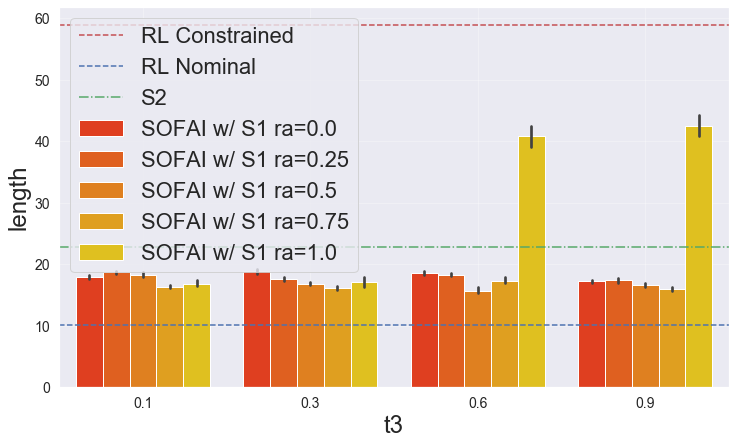

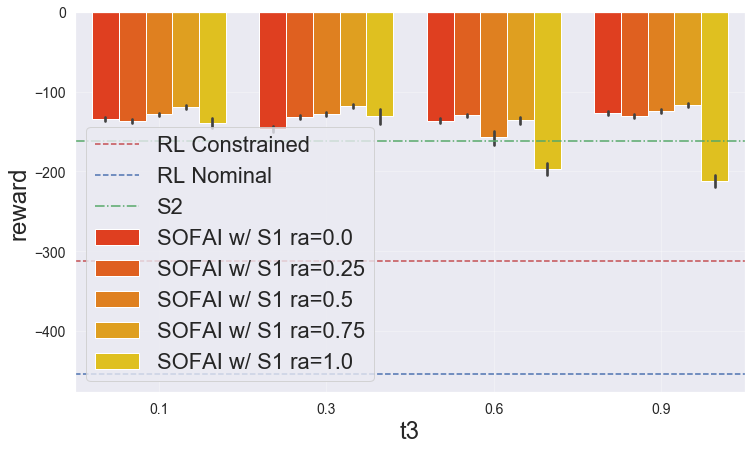

ok


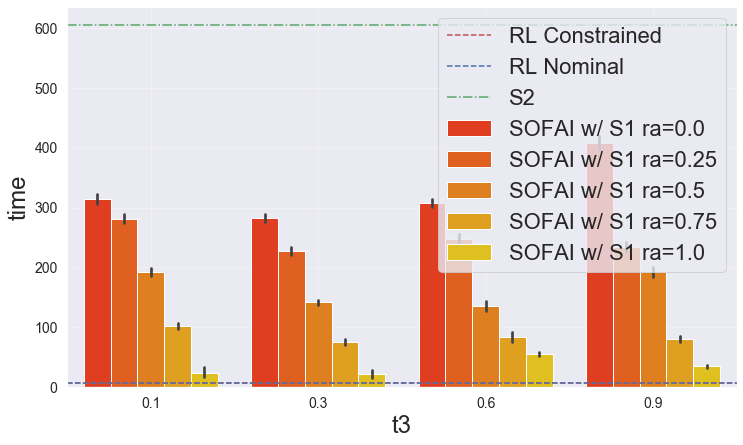

In [8]:
#temp_df = df.loc[(df['traj_n']>=0) & (df['t3']==threshold3) | (df['type']=='S1 noMyopic') | (df['type']=='S2') | (df['type']=='nominal')| (df['type']=='const')]
temp_df = df
#temp_df = temp_df.rename(columns={"01": "SOFAI-01", "s1": "S1-SOFAI"})

label_x = 't3'
label='length'
min_label, max_label = min_max(label, df)
plot_results(temp_df,x=label_x,y=label, min_label=min_label, max_label=20)

label='reward'
min_label, max_label = min_max(label, df)
plot_results(temp_df,x=label_x,y=label, min_label=-100, max_label=max_label)

label='time'
min_label, max_label = min_max(label, df)
print("ok")
plot_results(df,x=label_x,y=label, min_label=min_label, max_label=50)

#label='S1_Usage'
#min_label, max_label = min_max(label, df, df2, df3, df4, df7)
#plot_results(df3,x=label_x,y=label, min_label=min_label, max_label=max_label)

In [9]:
#df3.loc[(df3['type']=='02') & (df3['t3']==0.4)& (df3['t4']==0)]
#df

In [10]:
#df.type

In [11]:
def print_results(df, type_agent):
    print(f"{type_agent}: -> Length: {np.mean(df['length']):6.2f} \
 ({np.mean(df.loc[(df['sub_type']=='s1')]['usage']):6.2f} ; {np.mean(df.loc[(df['sub_type']=='s2')]['usage']):6.2f}) \
 Rew: {np.mean(df['reward']):10.4f} ({np.nanmean(df.loc[(df['sub_type']=='s1')]['avg_reward']):6.2f} ; {np.nanmean(df.loc[(df['sub_type']=='s2')]['avg_reward']):6.2f}) \
 Time: {np.mean(df['time']):10.4f} ({np.mean(df.loc[(df['sub_type']=='s1')]['avg_time']):6.4f} ; {np.mean(df.loc[(df['sub_type']=='s2')]['avg_time']):6.4f})")

#df3.loc[(df3['traj_n']>=0) & (df3['t4']==0) & (df3['t3']==0.4) & (df3['type']=='const')]
temp_df = df.loc[df['type']=='const']
print_results(temp_df,'RL')
temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['type']=='SOFAI w/ Myopic S1')]
print_results(temp_df,'01 M.')
temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['type']=='SOFAI w/ no Myopic S1')]
print_results(temp_df,'01 noM.')
temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['type']=='S1 noMyopic')]
print_results(temp_df,'S1 noM.')
temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['type']=='S1 Myopic')]
print_results(temp_df,'S1 M.')
temp_df = df.loc[(df['traj_n']>=bootstrap) & (df['type']=='S2')]
print_results(temp_df,'S2')



temp_df = df

RL: -> Length:  58.91  (   nan ;    nan)  Rew:  -312.8673 (   nan ;    nan)  Time:     6.6660 (   nan ;    nan)
01 M.: -> Length:    nan  (   nan ;    nan)  Rew:        nan (   nan ;    nan)  Time:        nan (   nan ;    nan)
01 noM.: -> Length:    nan  (   nan ;    nan)  Rew:        nan (   nan ;    nan)  Time:        nan (   nan ;    nan)
S1 noM.: -> Length:    nan  (   nan ;    nan)  Rew:        nan (   nan ;    nan)  Time:        nan (   nan ;    nan)
S1 M.: -> Length:    nan  (   nan ;    nan)  Rew:        nan (   nan ;    nan)  Time:        nan (   nan ;    nan)
S2: -> Length:  22.74  (  0.00 ;  22.74)  Rew:  -161.6319 (   nan ;  -7.43)  Time:   604.7000 (   nan ; 27.4623)


/Users/aloreggia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [12]:
df.to_csv("dati_myopic_nomyopic"+"_risk_"+str(threshold3)+".csv")
js_div.to_csv("jsdiv_myopic_nomyopic"+"_risk_"+str(threshold3)+".csv")
#pd.read_csv("dati_new_10grid_t1_100.csv")

In [33]:
def plot_subtype(x, y, df, hue, title, filename, min_label=0, max_label=None, list_threshold3= None, dropna = False):
    
    print(f"{[min_label, max_label]}")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_theme(style="whitegrid")
    sns.set(font_scale=2)
    sns.color_palette("viridis", as_cmap=True)
    
    fig = plt.figure(figsize=(25, 30))
    # grid for pairs of subplots
    rows = len(list_threshold3)
    cols = 5
    grid = plt.GridSpec(rows, cols)

    #figure, axis = plt.subplots(len(list_threshold3), 2, figsize=(25, 30))
    #plt.tight_layout()
    #print(axis)

    #for index, t3, sub_plot in enumerate(list_threshold3,axis):
    for i in range(rows):
        
        t3 = list_threshold3[i]
        # create fake subplot just to title set of subplots
        fake = fig.add_subplot(grid[i, :])
        # '\n' is important
        fake.set_title(f'{title+str(t3)}\n', fontweight='semibold')
        fake.set_axis_off()
        
        # create subgrid for two subplots without space between them
        # <https://matplotlib.org/2.0.2/users/gridspec.html>
        gs = gridspec.GridSpecFromSubplotSpec(1, cols, subplot_spec=grid[i, :])

        # real subplot #1
        ax = fig.add_subplot(gs[0])
        ax.set_title(f'R.a. = 0.0')
        temp_df = df.loc[(df['traj_n']>=0) & (df['t3']==t3) & ((df['type']=='SOFAI w/ S1 ra=0.0') )  ] #| (df['type']=='s1_nb') 
        if dropna : temp_df = temp_df.dropna()
        g=sns.lineplot(ax=ax, x=x, y=y, data=temp_df, hue=hue,markers=True, dashes=False)
        if max_label: g.set_ylim([min_label, max_label])
        #axis[0,0].set_title('Myopic')'''

        # real subplot #2
        ax = fig.add_subplot(gs[1], sharey=ax)
        ax.set_title(f'R.a. = 0.25')
        temp_df = df.loc[(df['traj_n']>=0) & (df['t3']==t3) &  ((df['type']=='SOFAI w/ S1 ra=0.25') )  ] #| (df['type']=='s1_nb') 
        if dropna : temp_df = temp_df.dropna()
        g=sns.lineplot(ax=ax, x=x, y=y, data=temp_df, hue=hue,markers=True, dashes=False)
        if max_label: g.set_ylim([min_label, max_label])
        #axis[0,1].set_title('No Myopic')
        
        # real subplot #2
        ax = fig.add_subplot(gs[2], sharey=ax)
        ax.set_title(f'R.a. = 0.5')
        temp_df = df.loc[(df['traj_n']>=0) & (df['t3']==t3) &  ((df['type']=='SOFAI w/ S1 ra=0.5') )  ] #| (df['type']=='s1_nb') 
        if dropna : temp_df = temp_df.dropna()
        g=sns.lineplot(ax=ax, x=x, y=y, data=temp_df, hue=hue,markers=True, dashes=False)
        if max_label: g.set_ylim([min_label, max_label])
            
        # real subplot #2
        ax = fig.add_subplot(gs[3], sharey=ax)
        ax.set_title(f'R.a. = 0.75')
        temp_df = df.loc[(df['traj_n']>=0) & (df['t3']==t3) &  ((df['type']=='SOFAI w/ S1 ra=0.75') )  ] #| (df['type']=='s1_nb') 
        if dropna : temp_df = temp_df.dropna()
        g=sns.lineplot(ax=ax, x=x, y=y, data=temp_df, hue=hue,markers=True, dashes=False)
        if max_label: g.set_ylim([min_label, max_label])
            
        # real subplot #2
        ax = fig.add_subplot(gs[4], sharey=ax)
        ax.set_title(f'R.a. = 1.0')
        temp_df = df.loc[(df['traj_n']>=0) & (df['t3']==t3) &  ((df['type']=='SOFAI w/ S1 ra=1.0') )  ] #| (df['type']=='s1_nb') 
        if dropna : temp_df = temp_df.dropna()
        g=sns.lineplot(ax=ax, x=x, y=y, data=temp_df, hue=hue,markers=True, dashes=False)
        if max_label: g.set_ylim([min_label, max_label])

    plt.savefig(filename+'.pdf')
    plt.show()

def plot_type(x, y, df, hue, title, filename, min_label=0, max_label=None, list_threshold3= None, dropna=False):
            
    #print(f"{[min_label, max_label]}")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_theme(style="whitegrid")
    sns.set(font_scale=2)
    sns.color_palette("viridis", as_cmap=True)
    
    fig = plt.figure(figsize=(25, 30))
    # grid for pairs of subplots
    rows = len(list_threshold3)
    cols = 5
    grid = plt.GridSpec(rows, cols)
    #print(df['type'])

    #figure, axis = plt.subplots(len(list_threshold3), 2, figsize=(25, 30))
    #plt.tight_layout()
    #print(axis)

    #for index, t3, sub_plot in enumerate(list_threshold3,axis):
    for i in range(rows):
        
        t3 = list_threshold3[i]
        # create fake subplot just to title set of subplots
        fake = fig.add_subplot(grid[i, :])
        # '\n' is important
        fake.set_title(f'{title+str(t3)}\n', fontweight='semibold')
        fake.set_axis_off()
        
        # create subgrid for two subplots without space between them
        # <https://matplotlib.org/2.0.2/users/gridspec.html>
        gs = gridspec.GridSpecFromSubplotSpec(1, cols, subplot_spec=grid[i, :])

        # real subplot #1
        ax = fig.add_subplot(gs[0])
        ax.set_title(f'R.a. = 0.0')
        temp_df = df.loc[(df['traj_n']>=0) & (((df['t3']==t3) & (df['type']=='SOFAI w/ S1 ra=0.0')) | (df['t3']==0))].dropna() #| (df['type']=='s1_nb') 
        if dropna : temp_df = temp_df.dropna()
        g=sns.lineplot(ax=ax, x=x, y=y, data=temp_df, hue=hue,markers=True, dashes=False)
        if max_label: g.set_ylim([min_label, max_label])
        #axis[0,0].set_title('Myopic')'''

        # real subplot #2
        ax = fig.add_subplot(gs[1], sharey=ax)
        ax.set_title(f'R.a. = 0.25')
        temp_df = df.loc[(df['traj_n']>=0) & (((df['t3']==t3) & (df['type']=='SOFAI w/ S1 ra=0.25')) | (df['t3']==0))].dropna() #| (df['type']=='s1_nb') 
        if dropna : temp_df = temp_df.dropna()
        g=sns.lineplot(ax=ax, x=x, y=y, data=temp_df, hue=hue,markers=True, dashes=False)
        if max_label: g.set_ylim([min_label, max_label])
            
        ax = fig.add_subplot(gs[2], sharey=ax)
        ax.set_title(f'R.a. = 0.5')
        temp_df = df.loc[(df['traj_n']>=0) & (((df['t3']==t3) & (df['type']=='SOFAI w/ S1 ra=0.5')) | (df['t3']==0))].dropna() #| (df['type']=='s1_nb') 
        if dropna : temp_df = temp_df.dropna()
        g=sns.lineplot(ax=ax, x=x, y=y, data=temp_df, hue=hue,markers=True, dashes=False)
        if max_label: g.set_ylim([min_label, max_label])
            
        ax = fig.add_subplot(gs[3], sharey=ax)
        ax.set_title(f'R.a. = 0.75')
        temp_df = df.loc[(df['traj_n']>=0) & (((df['t3']==t3) & (df['type']=='SOFAI w/ S1 ra=0.75')) | (df['t3']==0))].dropna() #| (df['type']=='s1_nb') 
        if dropna : temp_df = temp_df.dropna()
        g=sns.lineplot(ax=ax, x=x, y=y, data=temp_df, hue=hue,markers=True, dashes=False)
        if max_label: g.set_ylim([min_label, max_label])
            
        ax = fig.add_subplot(gs[4], sharey=ax)
        ax.set_title(f'R.a. = 1.0')
        temp_df = df.loc[(df['traj_n']>=0) & (((df['t3']==t3) & (df['type']=='SOFAI w/ S1 ra=1.0')) | (df['t3']==0))].dropna() #| (df['type']=='s1_nb') 
        if dropna : temp_df = temp_df.dropna()
        g=sns.lineplot(ax=ax, x=x, y=y, data=temp_df, hue=hue,markers=True, dashes=False)
        if max_label: g.set_ylim([min_label, max_label])
        #axis[0,1].set_title('No Myopic')

    plt.savefig(filename+'.pdf')
    plt.show()



[0, None]


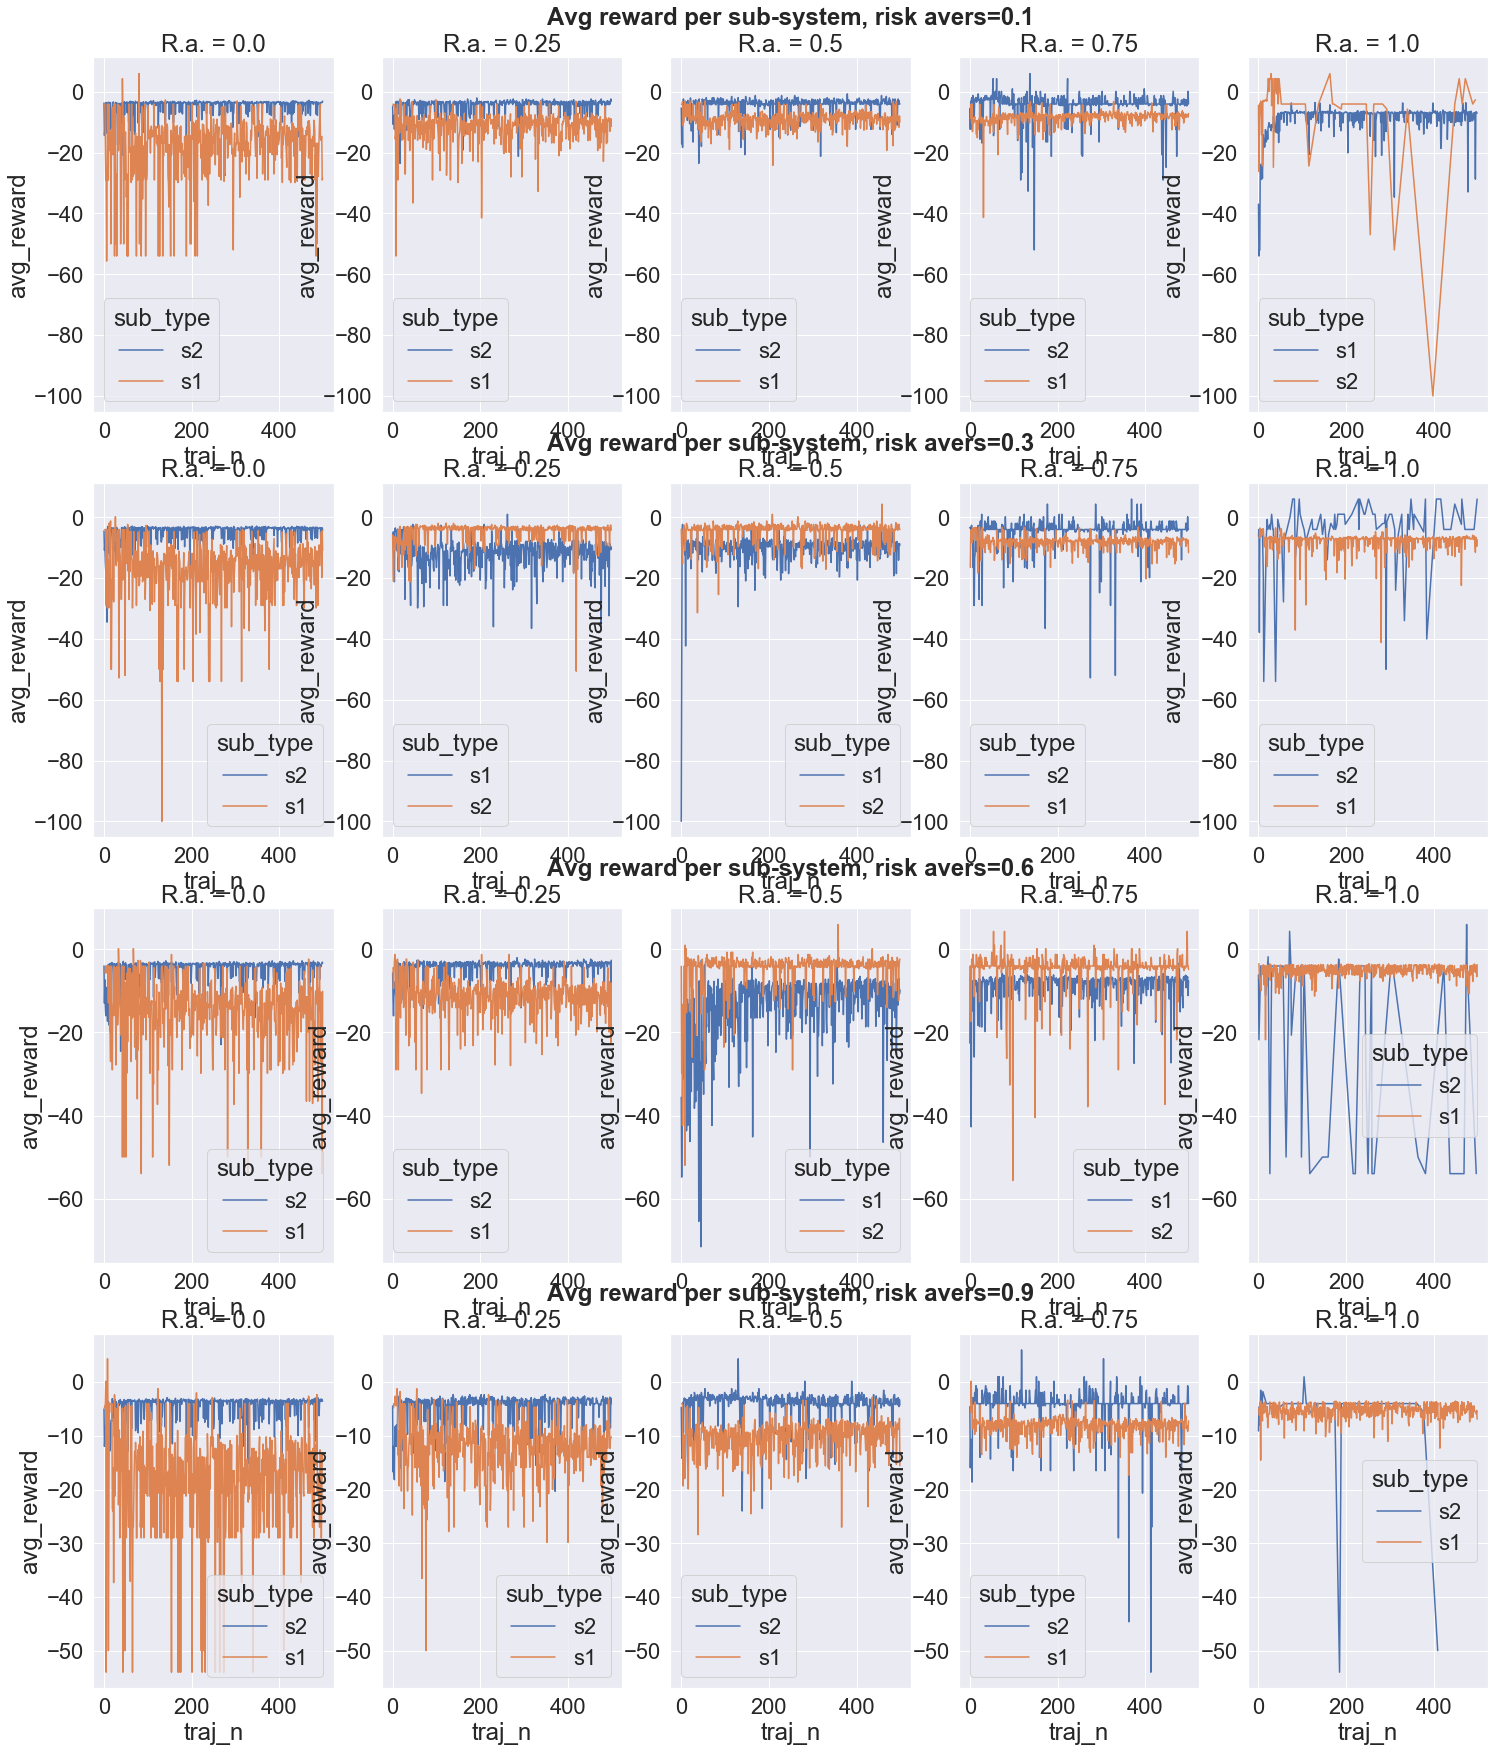

In [14]:
x='traj_n'
y='avg_reward'
#y='avg_time'
filename = y+'_risk_'
title="Avg reward per sub-system, risk avers="

plot_subtype(x,y,df, "sub_type",title,filename, list_threshold3=list_threshold3, dropna = True)


[0, None]


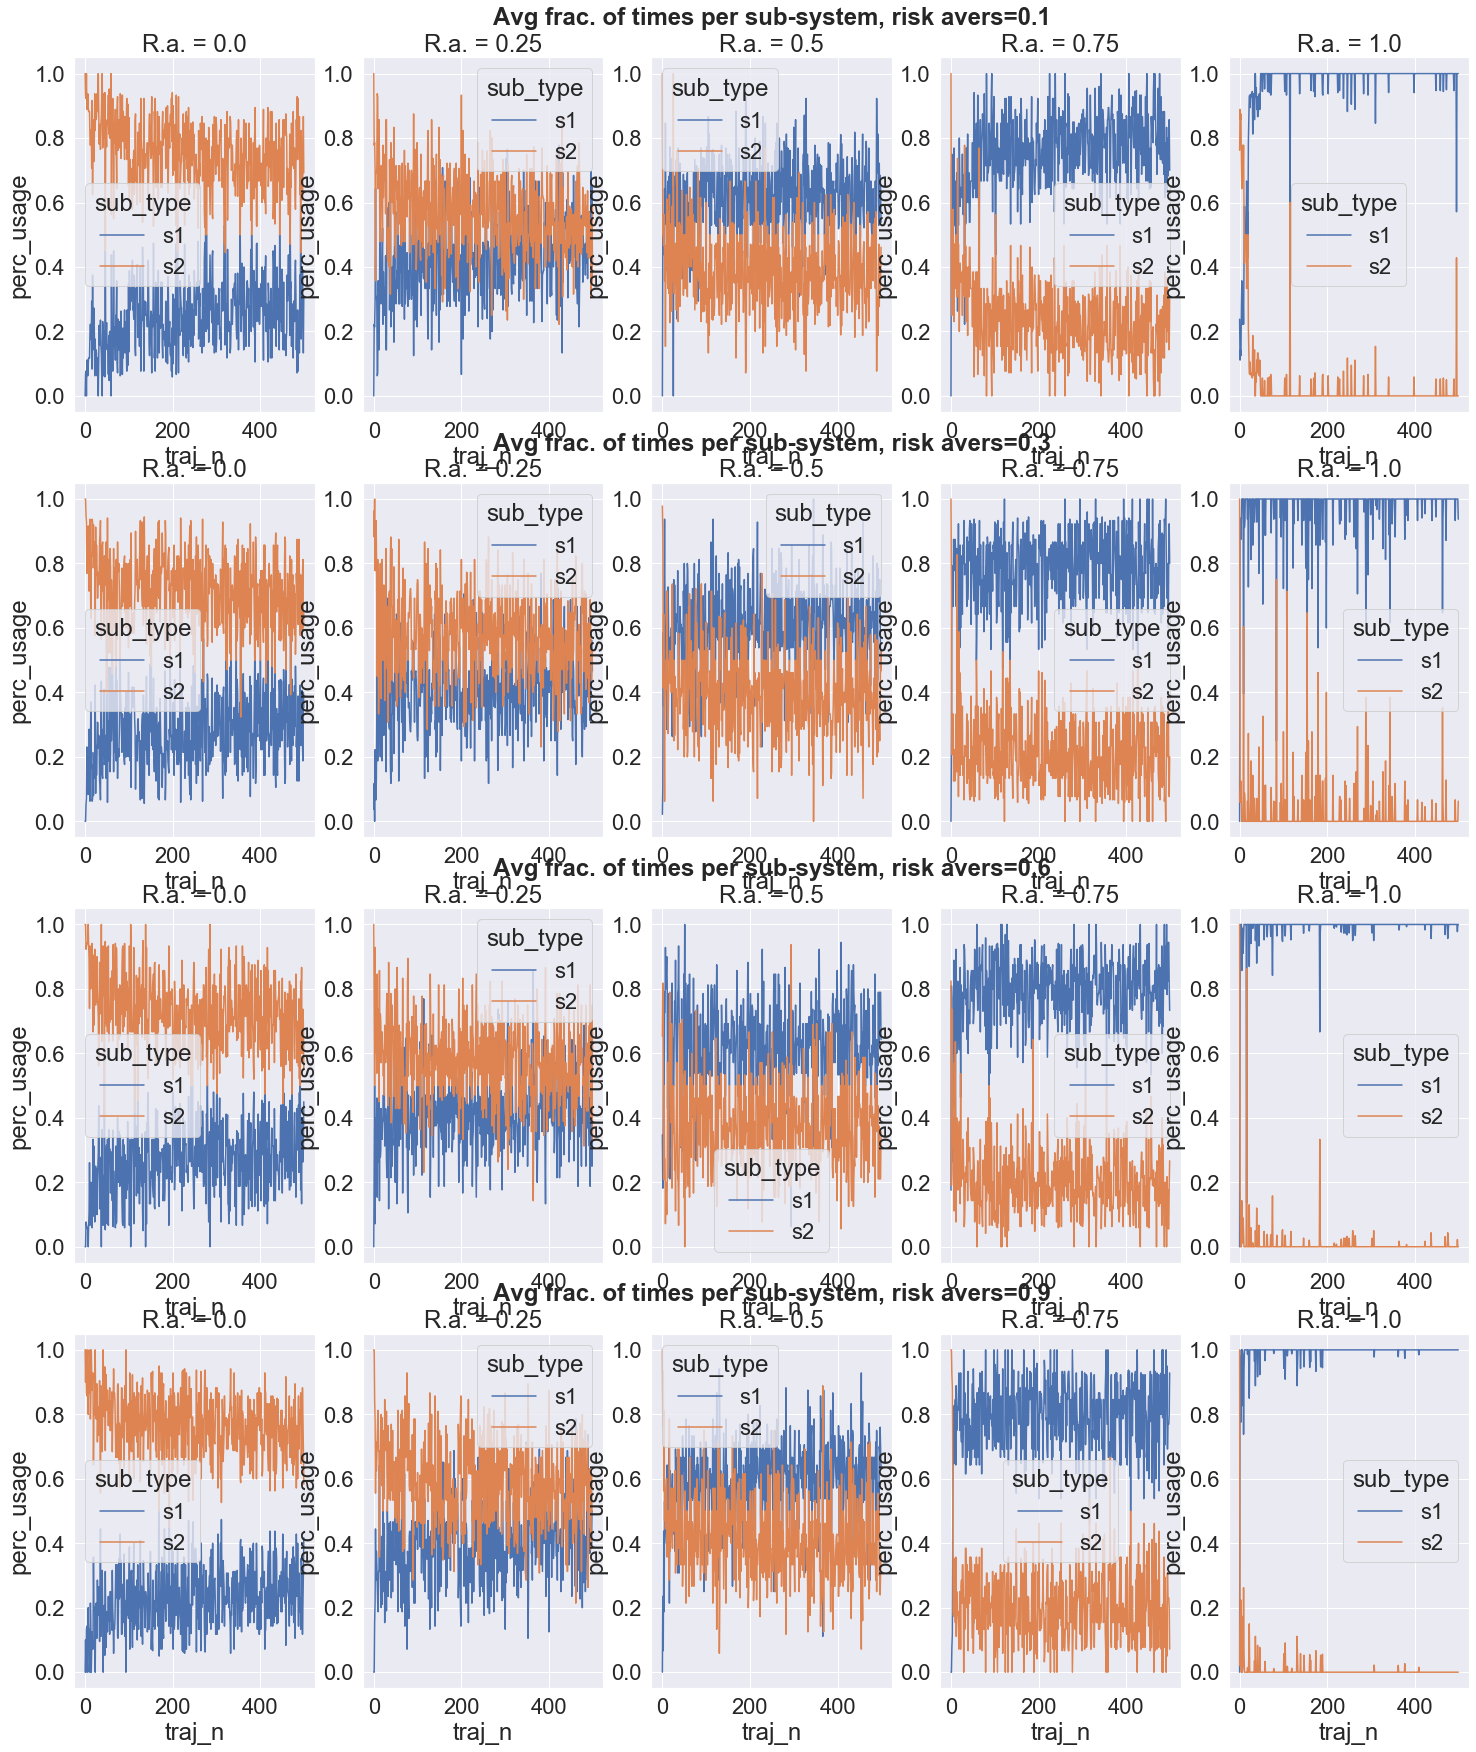

In [15]:
#temp_df = df.loc[(df['traj_n']>=bootstrap) & ( (df['type']=='s1_nb') | (df['type']=='s2')| (df['type']=='01')| (df['type']=='10')| (df['type']=='02'))]


x='traj_n'
y='perc_usage'
#y='avg_reward'
#y='avg_time'
filename = y+'_risk'
title="Avg frac. of times per sub-system, risk avers="

plot_subtype(x,y,df,"sub_type",title,filename, list_threshold3=list_threshold3)



[0, None]


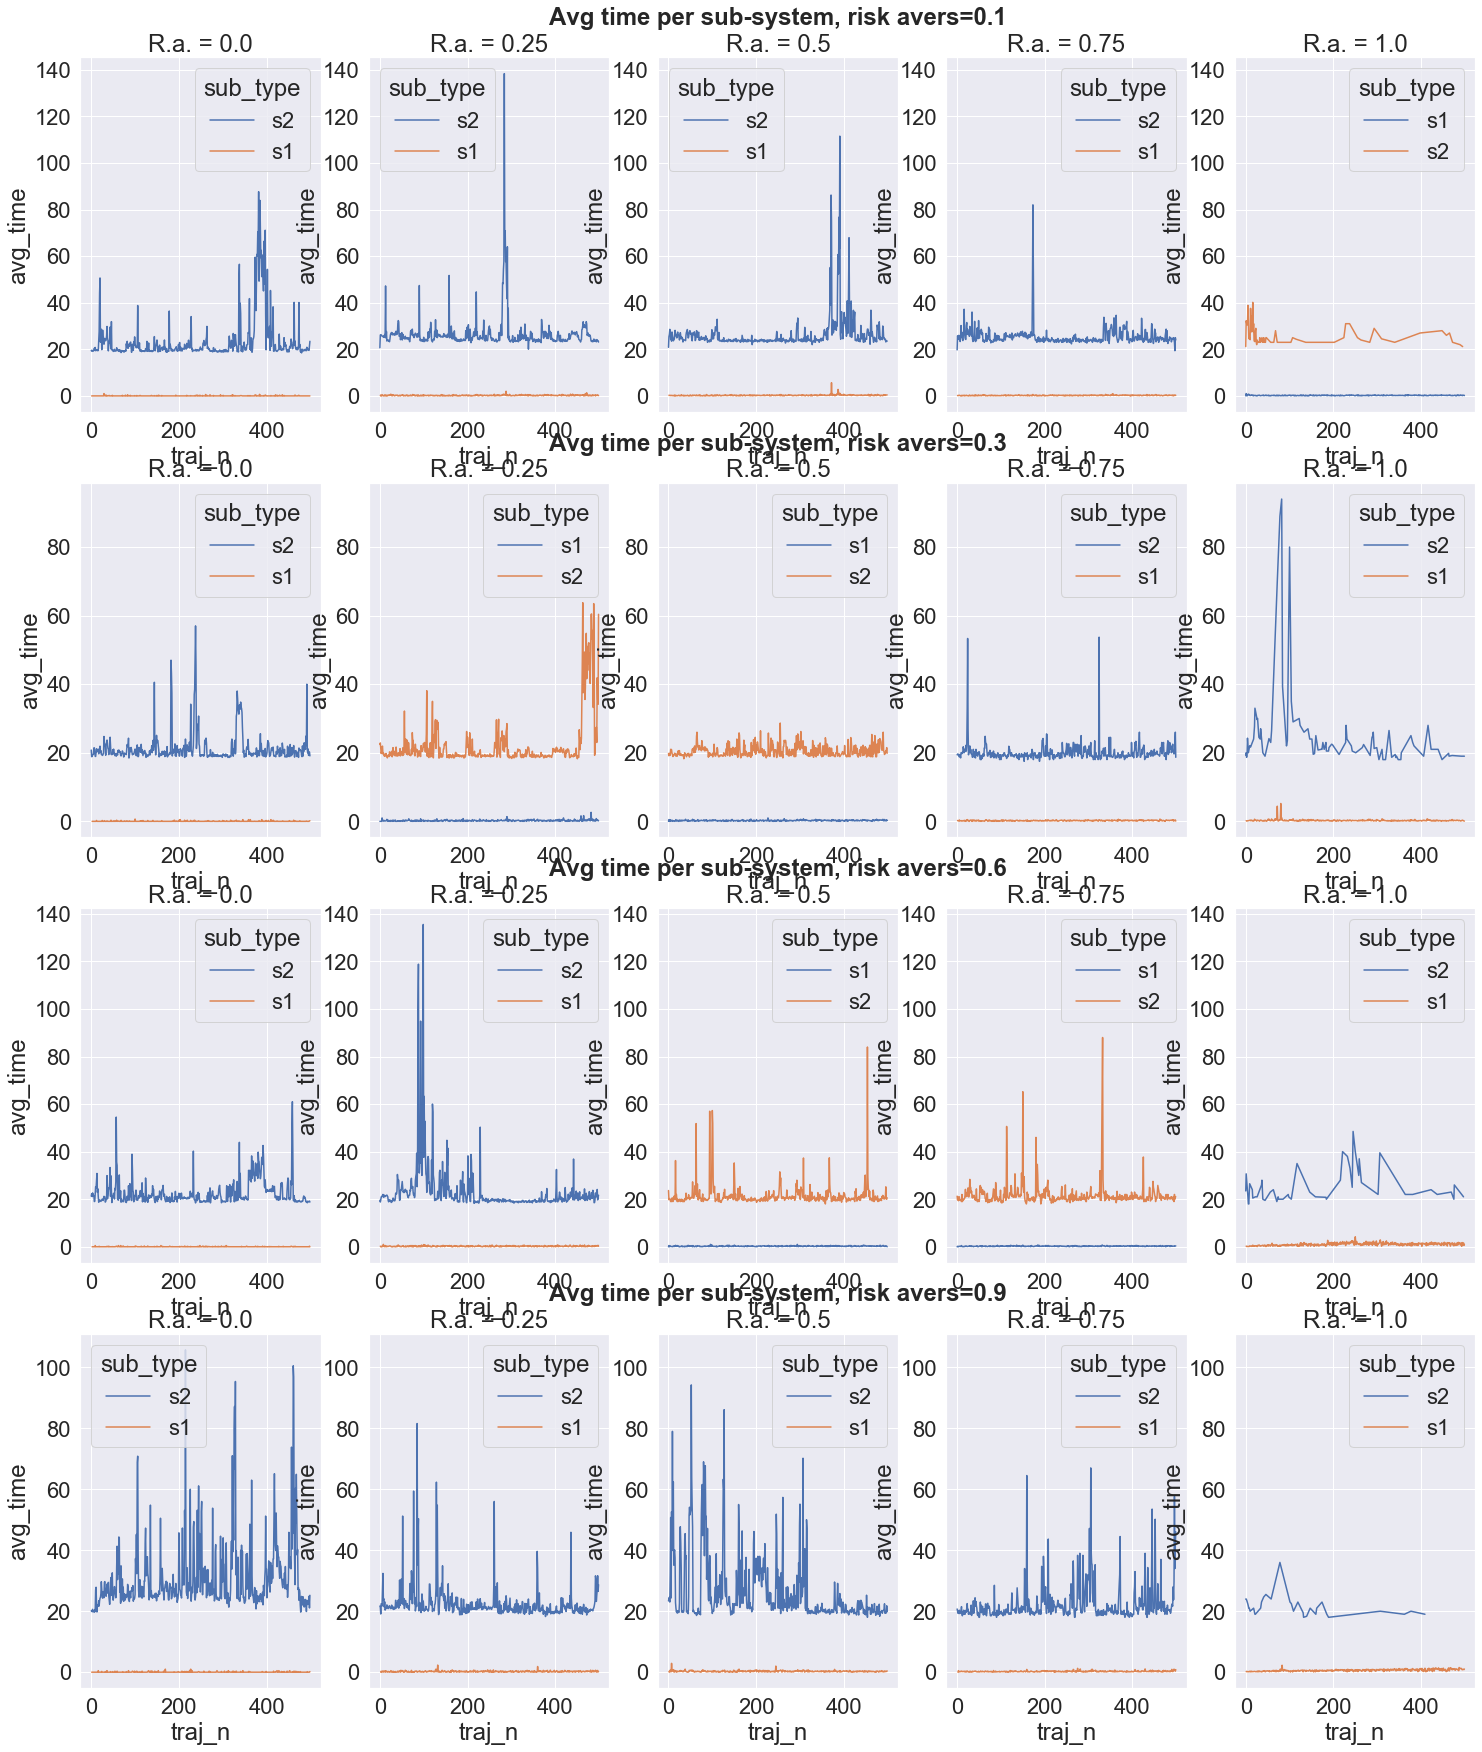

In [16]:
x='traj_n'
y='avg_time'
filename = y+'_time'
title="Avg time per sub-system, risk avers="

plot_subtype(x,y,df, "sub_type",title,filename, list_threshold3=list_threshold3, dropna = True)


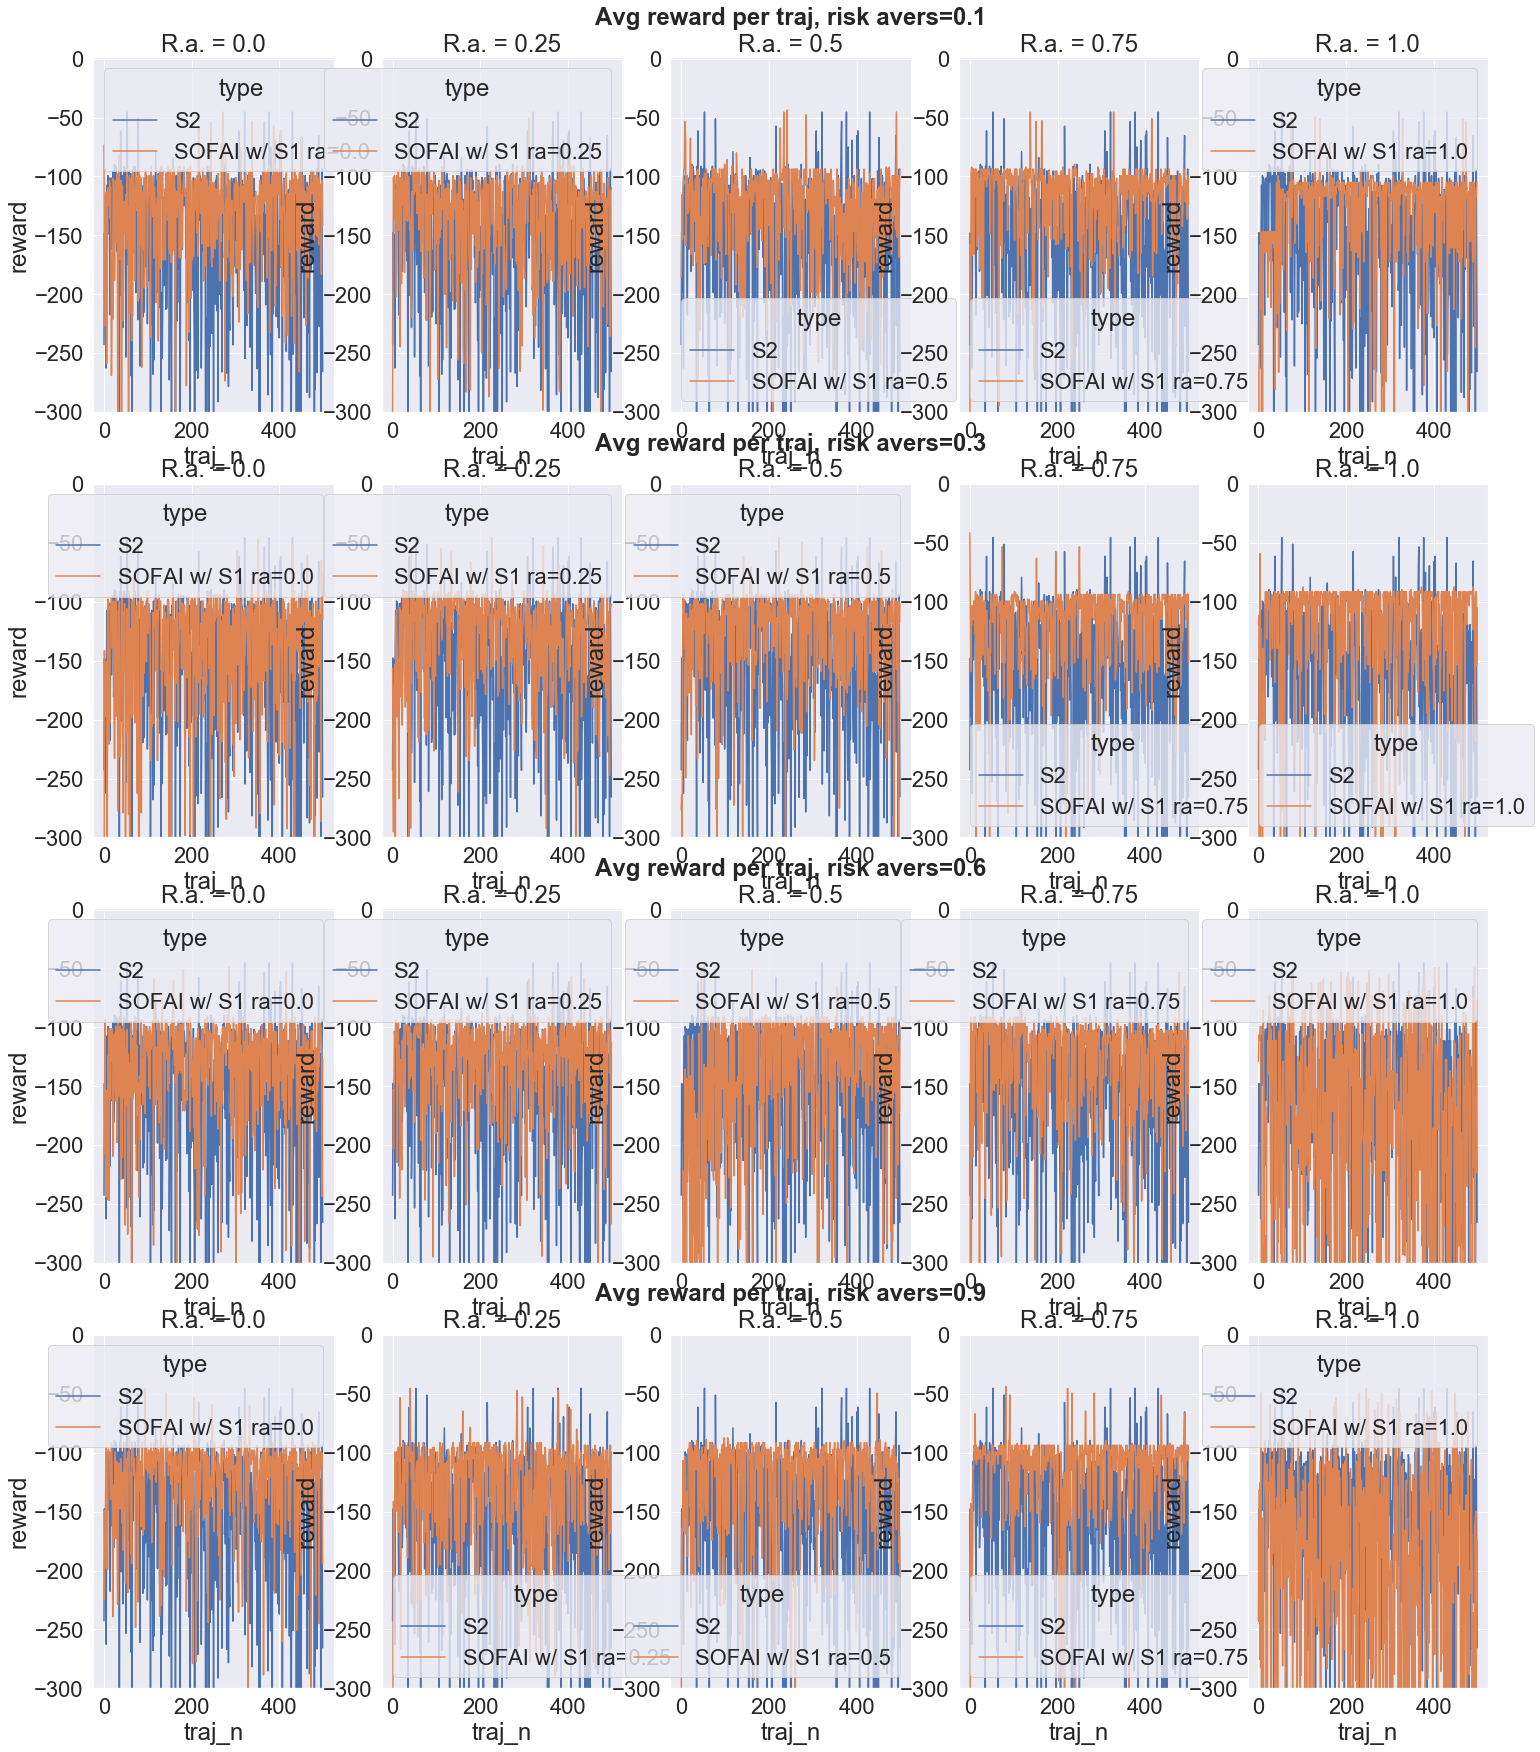

'y=\'time\'\n\nfilename = \'avg_time_per_traj\'\ntitle="Avg time per traj, risk avers="\n\nplot_type(x,y,temp_df,"type",title,filename, list_threshold3=list_threshold3, max_label=300)'

In [34]:
#temp_df = df.loc[(df['traj_n']>=bootstrap) & ( (df['type']=='s1_nb') | (df['type']=='s2')| (df['type']=='01')| (df['type']=='10')| (df['type']=='02'))]
temp_df = df.loc[(df['traj_n']>=bootstrap) & ( (df['type']=='S2')|  (df['type']=='SOFAI w/ no Myopic S1') |  (df['type']=='SOFAI w/ Myopic S1'))]
#temp_df = df.loc[(df['traj_n']>=0) & ((df['type']=='01') )  ] #| (df['type']=='s1_nb') 

#print(temp_df)

x='traj_n'
#y='perc_usage'
y='reward'
#y='time'


filename = 'avg_reward_per_traj'
title="Avg reward per traj, risk avers="

plot_type(x,y,df,"type",title,filename, list_threshold3=list_threshold3, max_label=1, min_label=-300)
#plot_subtype(x,y,temp_df, "type",title,filename, list_threshold3=list_threshold3)


'''y='time'

filename = 'avg_time_per_traj'
title="Avg time per traj, risk avers="

plot_type(x,y,temp_df,"type",title,filename, list_threshold3=list_threshold3, max_label=300)'''



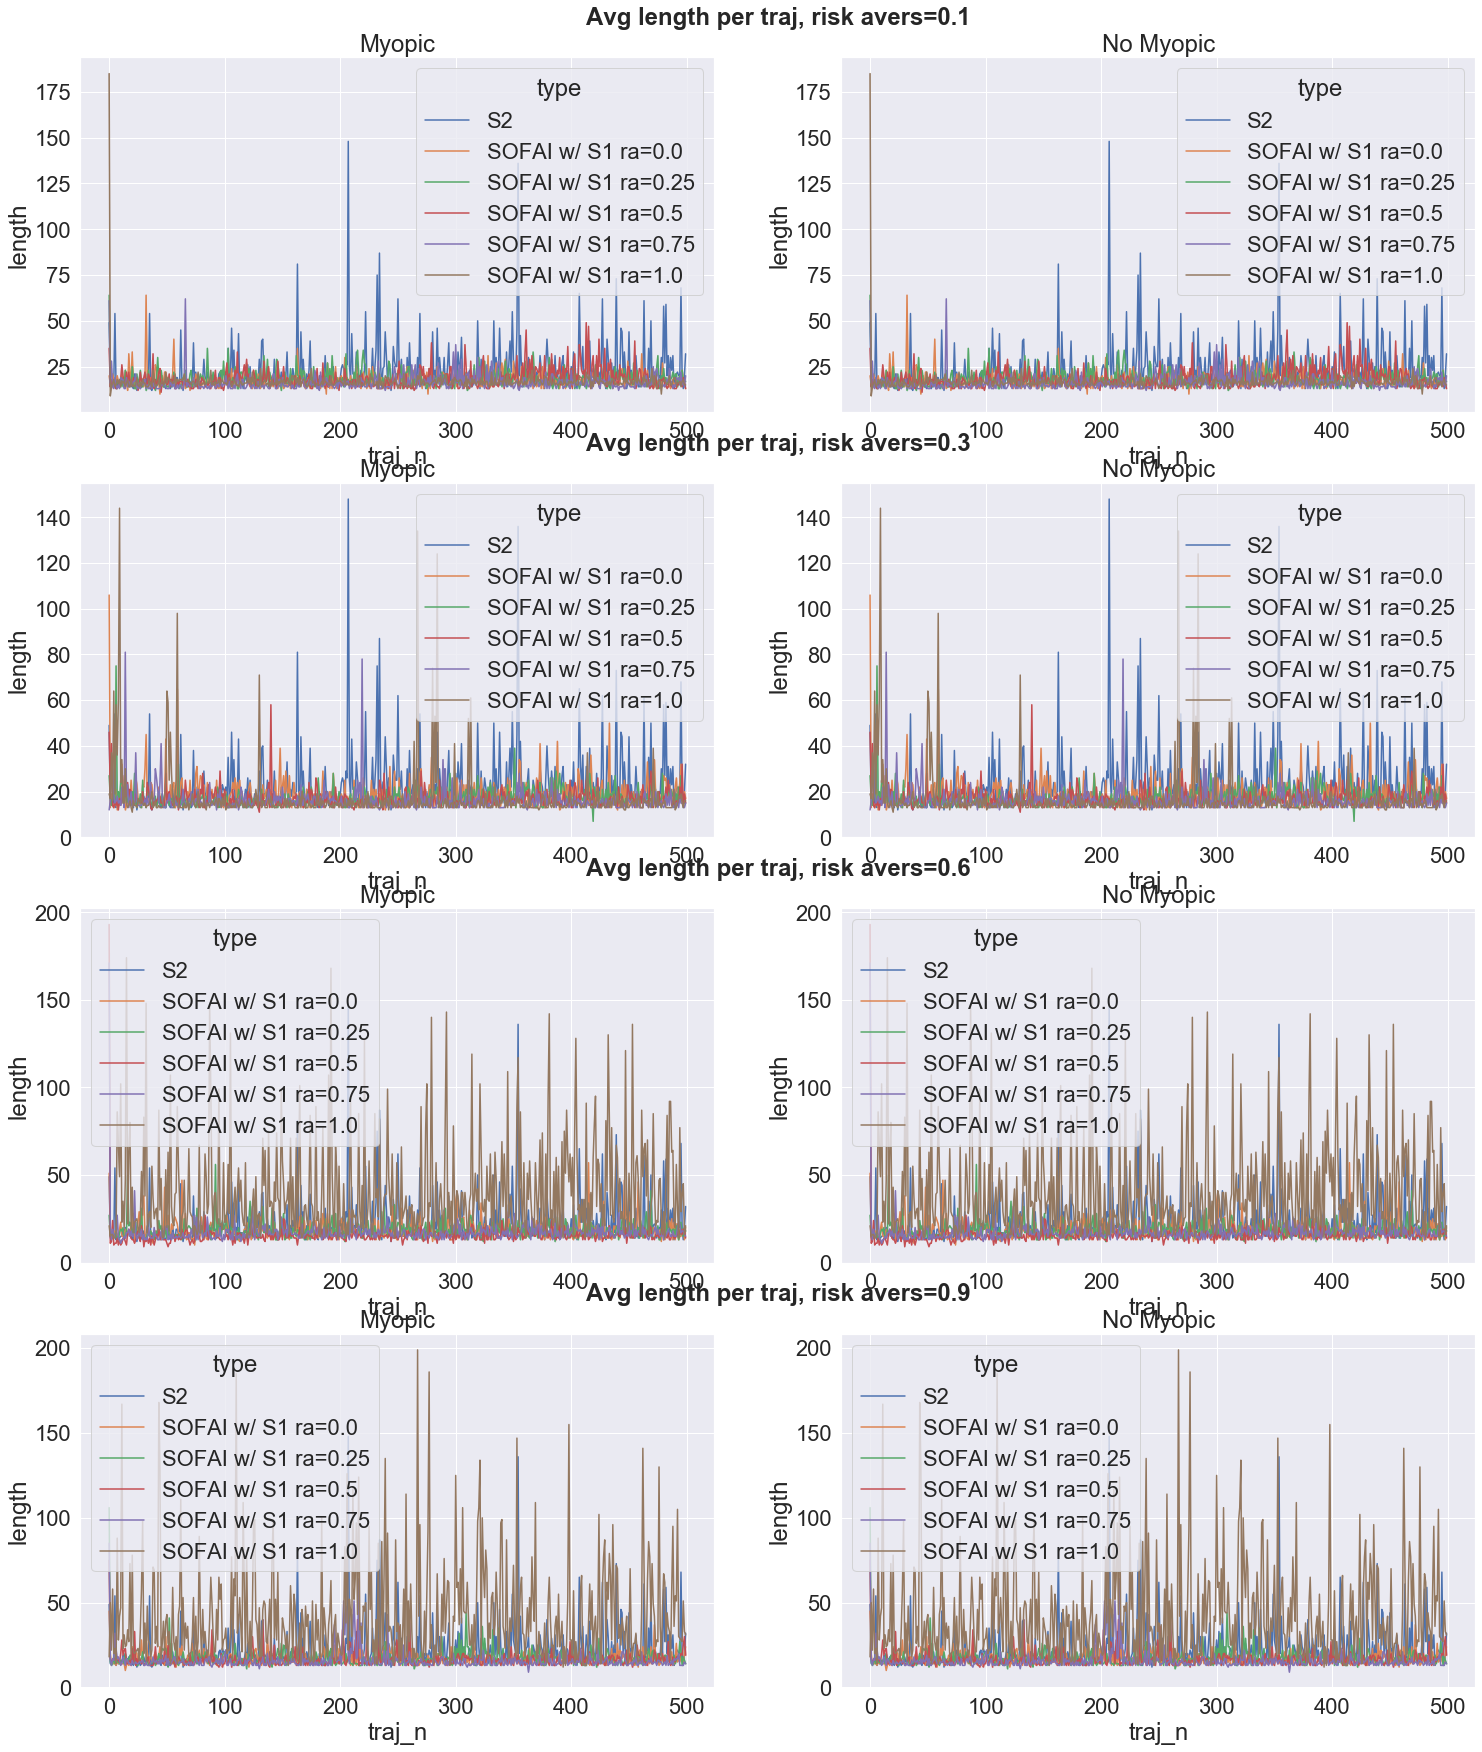

In [18]:
#temp_df = df.loc[(df['traj_n']>=bootstrap) & ( (df['type']=='S2')|  (df['type']=='SOFAI w/ no Myopic S1') |  (df['type']=='SOFAI w/ Myopic S1'))]
temp_df = df.loc[(df['traj_n']>=bootstrap) & ( (df['type']=='S2')|  (df['type']=='SOFAI w/ no Myopic S1') |  (df['type']=='SOFAI w/ Myopic S1'))]

y='length'

filename = 'avg_length_per_traj'
title="Avg length per traj, risk avers="

plot_type(x,y,df,"type",title,filename, list_threshold3=list_threshold3)

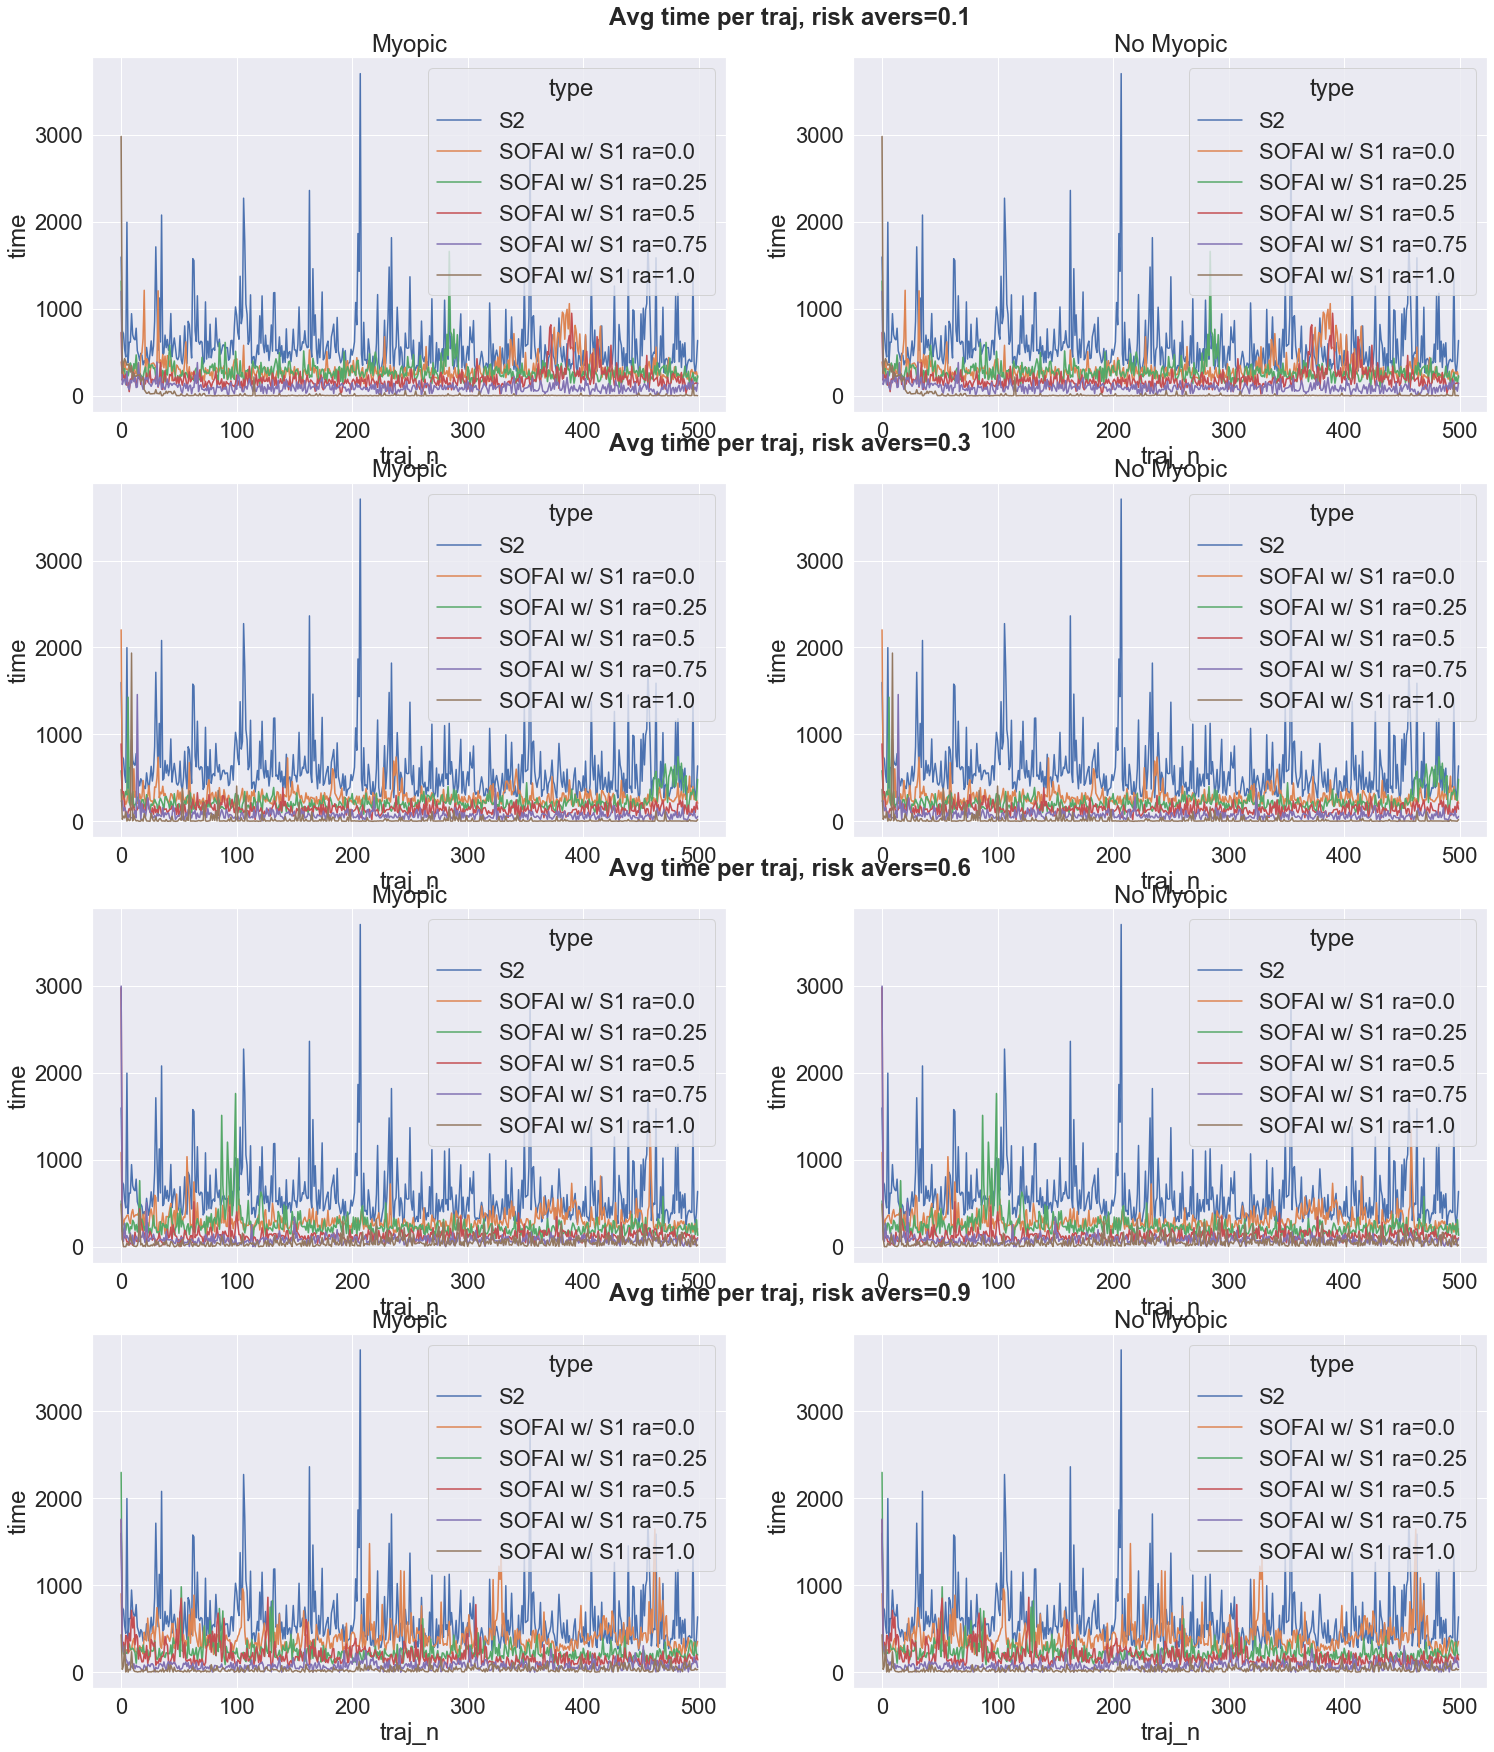

In [19]:
#temp_df = df.loc[(df['traj_n']>=bootstrap) & ( (df['type']=='s1_nb') | (df['type']=='s2')| (df['type']=='01')| (df['type']=='10')| (df['type']=='02'))]
#temp_df = df.loc[(df['traj_n']>=bootstrap) & ( (df['type']=='S2')| (df['type']=='S1 Myopic')|  (df['type']=='SOFAI w/ no Myopic S1') |  (df['type']=='SOFAI w/ Myopic S1'))]

y='time'
filename = 'avg_time_withS1_per_traj'
title="Avg time per traj, risk avers="

plot_type(x,y,df,"type",title,filename, list_threshold3=list_threshold3)#, max_label=250)


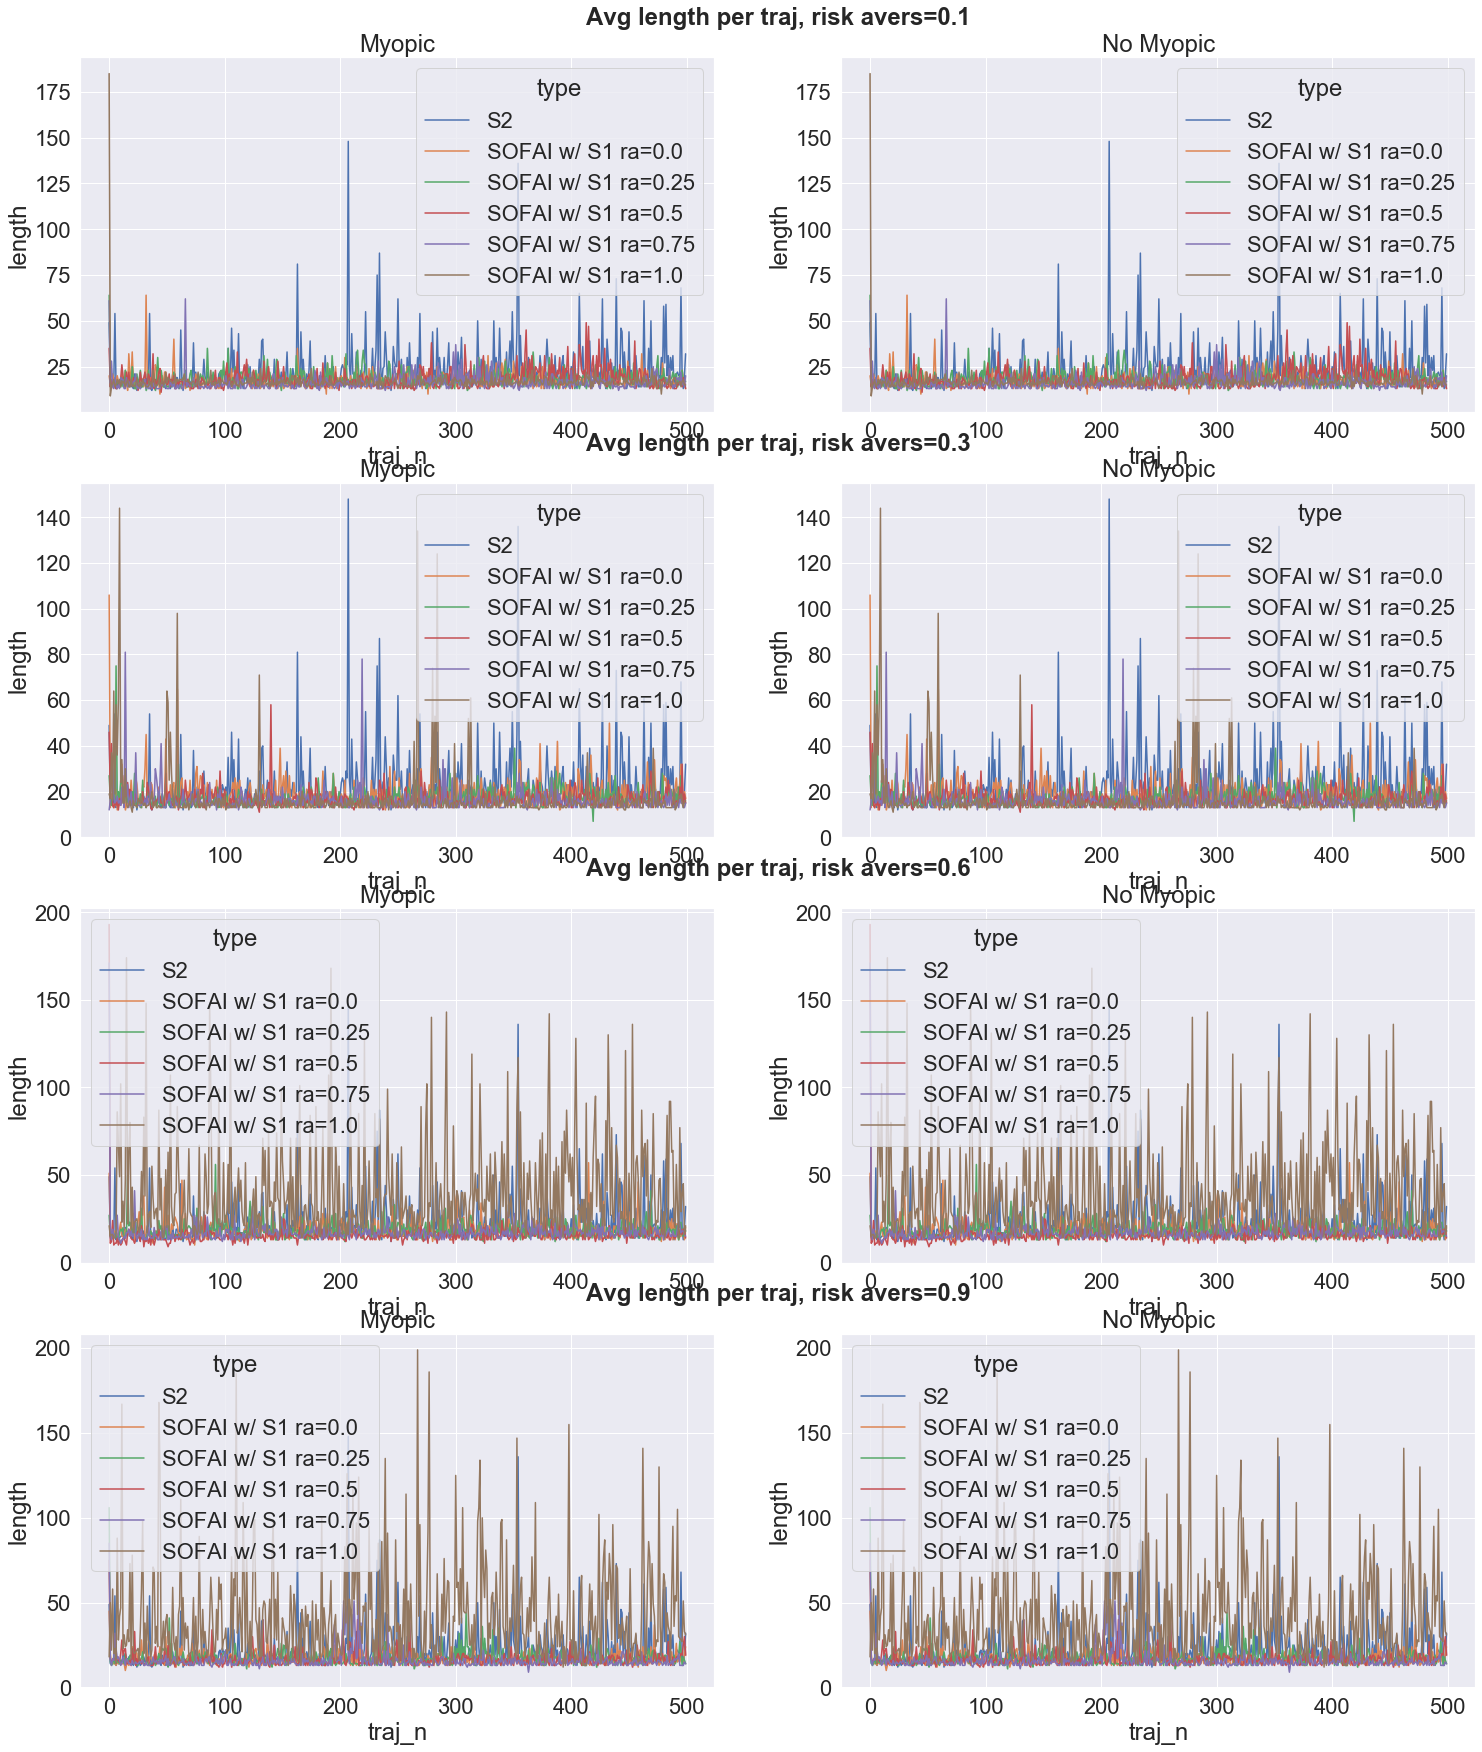

In [20]:
#temp_df = df.loc[(df['traj_n']>=bootstrap) & ( (df['type']=='S2')| (df['type']=='S1 Myopic')| (df['type']=='SOFAI w/ no Myopic S1') |  (df['type']=='SOFAI w/ Myopic S1'))]

y='length'
filename = 'avg_length_withS1_per_traj'
title="Avg length per traj, risk avers="

plot_type(x,y,df,"type",title,filename, list_threshold3=list_threshold3)

[0, None]


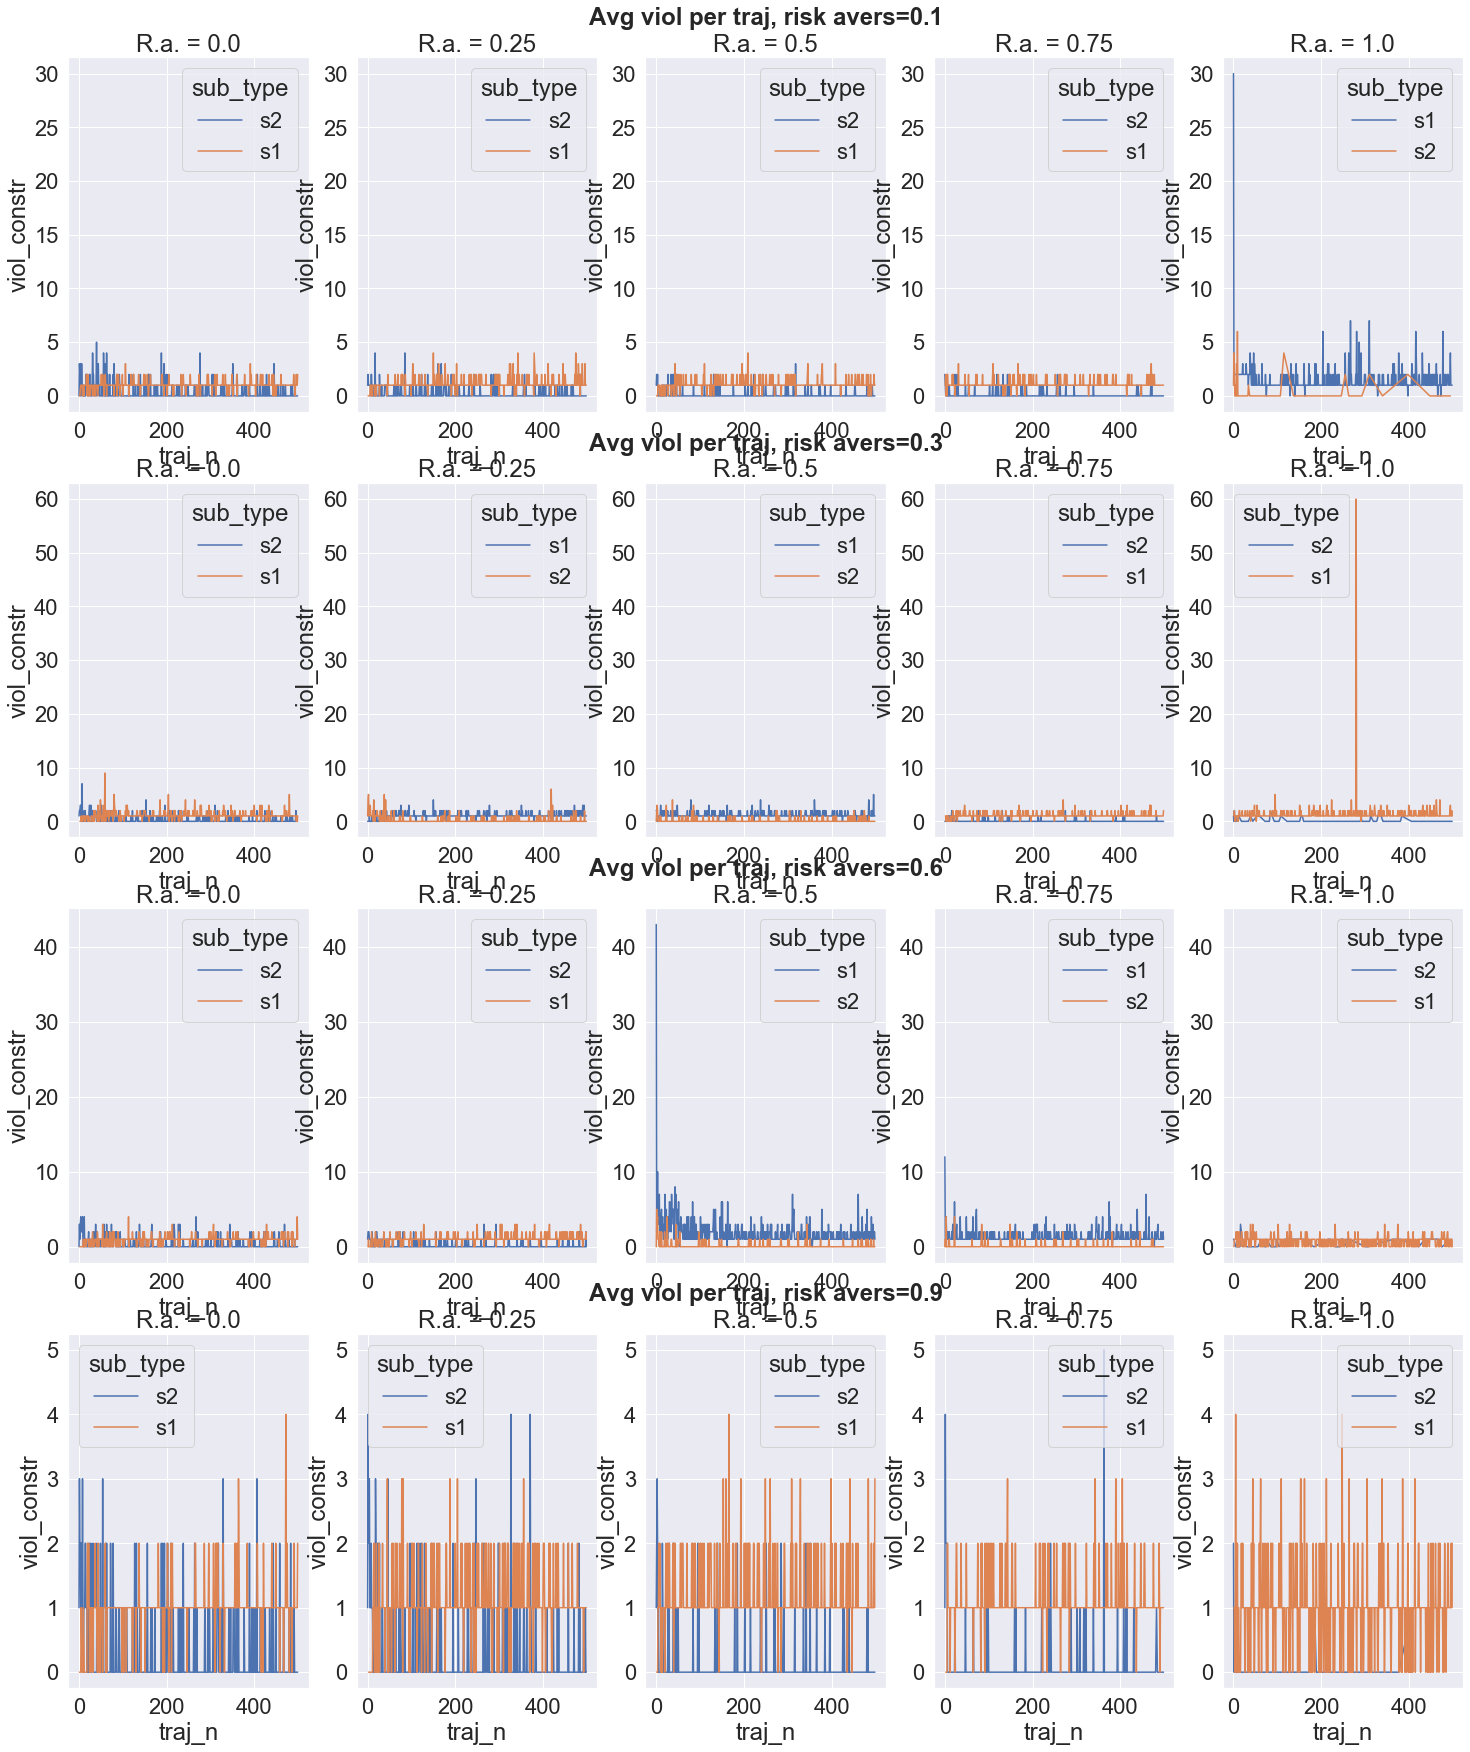

In [29]:
temp_df = df.loc[(df['traj_n']>=bootstrap) & ( (df['type']=='S2')|  (df['type']=='SOFAI w/ no Myopic S1'))]

y='viol_constr'
filename = 'avg_viol_withS1_per_traj'
title="Avg viol per traj, risk avers="

plot_subtype(x,y,df,"sub_type",title,filename, list_threshold3=list_threshold3, dropna=True)

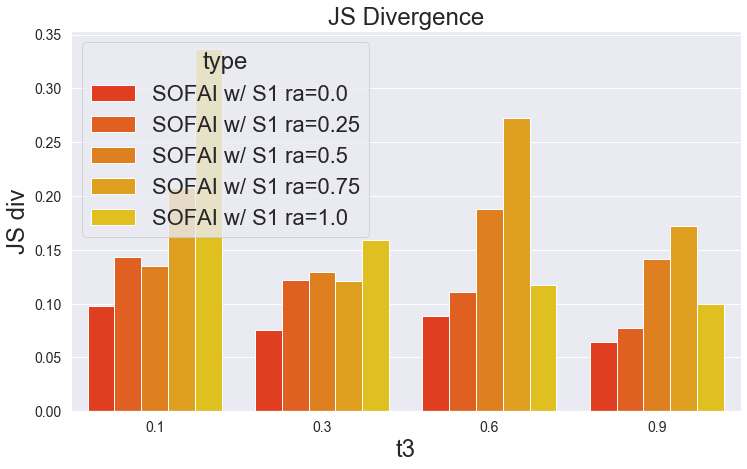

In [22]:
#js_div = pd.read_csv('remaining_time/same_grid/risk0.8/jsdiv_myopic_nomyopic_risk_0.8.csv')
#temp_df = js_div.loc[((js_div['t3']==threshold3) & (js_div['t4']==threshold4)) | (js_div['type']=='s1_nb')]
temp_df =js_div

y='jsdiv'


fig=plt.figure(figsize=(12, 7))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)
sns.color_palette("viridis", as_cmap=True)
g = sns.barplot(x='t3', y=y, hue="type", data=temp_df, palette="autumn", ci=95);

h, l = g.get_legend_handles_labels()
#labels=['S1',"SOFAI 01","SOFAI 10","SOFAI 02"]
#g.legend(h, labels)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("t3")
plt.ylabel("JS div")
plt.title("JS Divergence")
plt.show()
fig.savefig(f"avg_js_dist.pdf", bbox_inches = 'tight') 

In [23]:
#mca_01_myopic.__dict__

In [24]:
#temp_dict


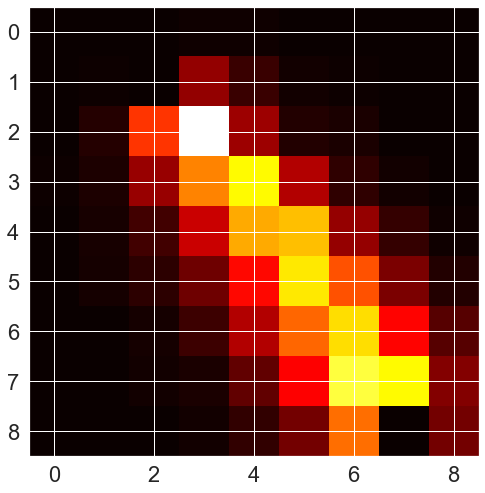

49

In [25]:
temp_matrix = count_states(demo_n.trajectories, n_cfg.mdp, n, constraints)

Z_distr = f(temp_matrix)
#print(int(start%9))
Z_distr[8-int(start/9)][int(start%9)]=0
Z_distr[8-int(goal/9)][int(goal%9)]

Z_distr = np.array(Z_distr)
Z_distr = Z_distr + 1E-3

plt.imshow(Z_distr/np.sum(Z_distr), cmap='hot', interpolation='nearest')
plt.show()

Z_distr/np.sum(Z_distr)
distr = np.array(Z_distr/np.sum(Z_distr))


np.random.choice(np.arange(0,81), replace=False, p = distr.flatten())

In [26]:
mca_01_noMyopic.thresholds_stat

NameError: name 'mca_01_noMyopic' is not defined

In [ ]:
m = [np.sum(mca_01_noMyopic.modelSelf.s1_wrong_list[-200-i:-i]) / len(mca_01_noMyopic.modelSelf.s1_wrong_list[-200-i:-i]) for i in range(1,len(mca_01_noMyopic.modelSelf.s1_wrong_list))]

In [ ]:
m.reverse()

In [ ]:
plt.plot(m)
plt.show()

In [ ]:
#m = [np.sum(mca_01_myopic.modelSelf.s1_wrong_list[-200-i:-i]) / len(mca_01_myopic.modelSelf.s1_wrong_list[-200-i:-i]) for i in range(1,len(mca_01_myopic.modelSelf.s1_wrong_list))]

In [ ]:
#mca_01_noMyopic.action_reward

In [ ]:
m2 = [np.sum(mca_01_noMyopic.modelSelf.s2_wrong_list[-200-i:-i]) / len(mca_01_noMyopic.modelSelf.s2_wrong_list[-200-i:-i]) for i in range(1,len(mca_01_noMyopic.modelSelf.s2_wrong_list))]
m2.reverse()
plt.plot(m2)
plt.show()

In [ ]:
sum(mca_01_noMyopic.modelSelf.__dict__['s2_wrong_list'][0:200])/200

In [ ]:
[np.sum(mca_01_noMyopic.modelSelf.s1_wrong_list[-200-i:-i]) / len(mca_01_noMyopic.modelSelf.s1_wrong_list[-200-i:-i]) for i in range(1,len(mca_01_noMyopic.modelSelf.s1_wrong_list))]

In [ ]:
mca_01_noMyopic.modelSelf.s1_wrong_list[-200:-1]

In [ ]:
max_time = max(df.time)
temp_df = df
temp_df['rew_time'] = df.apply(lambda row: (-1)/(row.reward)*(row.time/max_time) , axis = 1)

In [ ]:
temp_df_small = temp_df.loc[(temp_df['traj_n']>=bootstrap) & (temp_df['type']=='SOFAI w/ no Myopic S1') ]

x='time'
y='rew_time'

filename = 'avg_rewtime_per_traj'
title="Avg rew/time per traj, risk avers="

#plot_type(x,y,temp_df_small,"sub_type",title,filename, list_threshold3=list_threshold3, min_label=-200, max_label=1)

sns.scatterplot(data=temp_df_small, x=x, y=y, hue="sub_type")
plt.show()

In [ ]:
temp_df.iloc[1]

In [ ]:
max(df.time)